In [10]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

def vgg16_model(trainable=True):
    base_model = VGG16(False, "imagenet")
    train_from_layer = -2
    for layer in base_model.layers[:train_from_layer]:
        layer.trainable = False
        print("{} is not trainable".format(layer.name))
    for layer in base_model.layers[train_from_layer:]:
        layer.trainable = True
        print("{} is trainable".format(layer.name))
    last_conv_layer = base_model.get_layer("block5_conv3")
    x = GlobalAveragePooling2D()(last_conv_layer.output)
    x = Dense(512, activation="relu")(x)
    predictions = Dense(1, activation="sigmoid")(x)
    return Model(base_model.input, predictions)

model = vgg16_model(False)
model.summary()

input_2 is not trainable
block1_conv1 is not trainable
block1_conv2 is not trainable
block1_pool is not trainable
block2_conv1 is not trainable
block2_conv2 is not trainable
block2_pool is not trainable
block3_conv1 is not trainable
block3_conv2 is not trainable
block3_conv3 is not trainable
block3_pool is not trainable
block4_conv1 is not trainable
block4_conv2 is not trainable
block4_conv3 is not trainable
block4_pool is not trainable
block5_conv1 is not trainable
block5_conv2 is not trainable
block5_conv3 is trainable
block5_pool is trainable
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64) 

In [3]:
from Datasets import Datasets

dataset_name = "Bradbury"
dataset = Datasets.datasets()[dataset_name]

In [4]:
from keras.applications.xception import preprocess_input
import numpy as np

# Add preprocessing
train_images = dataset[0].images
train_labels  = dataset[0].labels

test_images = dataset[1].images
test_labels = dataset[1].labels

validation_images = dataset[2].images
validation_labels = dataset[2].labels

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from ProjectPaths import ProjectPaths

In [6]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator()


In [12]:
from PerformanceMetrics import PerformanceMetrics

model.compile(optimizer="rmsprop", loss='binary_crossentropy',
                  metrics=['accuracy', PerformanceMetrics.precision,
                           PerformanceMetrics.recall, PerformanceMetrics.fmeasure])

In [8]:
batch_size = 64

train_generator = data_generator.flow(train_images, train_labels, batch_size=batch_size)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

In [13]:
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping


epochs = 100

model_name = "vgg16_3t_wmp_wr_{}".format(dataset_name)

checkpoint_dir = ProjectPaths.checkpoint_dir_for(model_name, batch_size, epochs)
if not os.path.exists(checkpoint_dir):
    os.mkdir(checkpoint_dir)

file_in_checkpoint_dir = ProjectPaths.file_in_checkpoint_dir(model_name, batch_size,
                                                                 epochs,  model_name +
                                                                 "__{epoch:02d}_{val_acc:.2f}.hdf5")

early_stopping_callback = EarlyStopping(patience=10)
model_checkpoint_callback = ModelCheckpoint(file_in_checkpoint_dir, monitor='val_acc', verbose=True,
                                                save_weights_only=True,
                                                save_best_only=True)

log_dir = os.path.join(ProjectPaths.log_dir(), model_name)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0,  write_graph=False, write_images=False)


model.fit_generator(train_generator,
                    steps_per_epoch=len(train_labels) // batch_size, 
                    epochs=epochs,
                    callbacks=[early_stopping_callback, model_checkpoint_callback, tensorboard_callback],
                    validation_data=test_generator,
                    validation_steps=len(test_labels))

Epoch 1/100
496/496 [==============================] - 25s 50ms/step - loss: 0.3573 - acc: 0.8513 - precision: 0.8317 - recall: 0.8866 - fmeasure: 0.8489 - val_loss: 0.2893 - val_acc: 0.8784 - val_precision: 0.9282 - val_recall: 0.8153 - val_fmeasure: 0.8661

Epoch 00001: val_acc improved from -inf to 0.87843, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr_Bradbury_2018-09-03_64_100/vgg16_3t_wmp_wr_Bradbury__01_0.88.hdf5
Epoch 2/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2776 - acc: 0.8816 - precision: 0.8637 - recall: 0.9117 - fmeasure: 0.8831 - val_loss: 0.2742 - val_acc: 0.8802 - val_precision: 0.8153 - val_recall: 0.9782 - val_fmeasure: 0.8879

Epoch 00002: val_acc improved from 0.87843 to 0.88019, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr_Bradbury_2018-09-03_64_100/vgg16_3t_wmp_wr_Bradbury__02_0.88.hdf5
Epoch 3/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2683 - acc


Epoch 00022: val_acc did not improve from 0.91870
Epoch 23/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2103 - acc: 0.9154 - precision: 0.9023 - recall: 0.9335 - fmeasure: 0.9157 - val_loss: 0.2338 - val_acc: 0.9154 - val_precision: 0.9246 - val_recall: 0.9009 - val_fmeasure: 0.9116

Epoch 00023: val_acc did not improve from 0.91870
Epoch 24/100
496/496 [==============================] - 25s 50ms/step - loss: 0.2068 - acc: 0.9162 - precision: 0.9031 - recall: 0.9336 - fmeasure: 0.9162 - val_loss: 0.2172 - val_acc: 0.9182 - val_precision: 0.8837 - val_recall: 0.9614 - val_fmeasure: 0.9197

Epoch 00024: val_acc did not improve from 0.91870
Epoch 25/100
496/496 [==============================] - 24s 48ms/step - loss: 0.2084 - acc: 0.9180 - precision: 0.9055 - recall: 0.9341 - fmeasure: 0.9179 - val_loss: 0.2157 - val_acc: 0.9220 - val_precision: 0.8987 - val_recall: 0.9499 - val_fmeasure: 0.9226

Epoch 00025: val_acc improved from 0.91870 to 0.92197, saving mode

496/496 [==============================] - 24s 48ms/step - loss: 0.1809 - acc: 0.9286 - precision: 0.9200 - recall: 0.9404 - fmeasure: 0.9287 - val_loss: 0.2169 - val_acc: 0.9232 - val_precision: 0.8837 - val_recall: 0.9733 - val_fmeasure: 0.9252

Epoch 00048: val_acc did not improve from 0.92600
Epoch 49/100
496/496 [==============================] - 24s 49ms/step - loss: 0.1849 - acc: 0.9270 - precision: 0.9192 - recall: 0.9375 - fmeasure: 0.9266 - val_loss: 0.2349 - val_acc: 0.9169 - val_precision: 0.8729 - val_recall: 0.9733 - val_fmeasure: 0.9195

Epoch 00049: val_acc did not improve from 0.92600
Epoch 50/100
496/496 [==============================] - 24s 49ms/step - loss: 0.1837 - acc: 0.9271 - precision: 0.9175 - recall: 0.9389 - fmeasure: 0.9265 - val_loss: 0.1939 - val_acc: 0.9273 - val_precision: 0.9081 - val_recall: 0.9492 - val_fmeasure: 0.9272

Epoch 00050: val_acc improved from 0.92600 to 0.92726, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr

In [14]:
import pandas as pd

train_eval = model.evaluate(train_images, train_labels, batch_size)
test_eval = model.evaluate(test_images, test_labels, batch_size)
validation_eval = model.evaluate(validation_images, validation_labels, batch_size)

np_model_evaluations = np.array([train_eval, test_eval, validation_eval])

evaluations = pd.DataFrame(np_model_evaluations, columns=model.metrics_names)
print(evaluations.head())

3973/3973 [==============================] - 2s 380us/step
       loss       acc  precision    recall  fmeasure
0  0.159160  0.939325   0.913289  0.970972  0.940400
1  0.237877  0.924239   0.891716  0.963806  0.925234
2  0.270463  0.915429   0.885142  0.957076  0.918740


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

def find_optimal_cutoff(target, predicted):
   """ Find the optimal probability cutoff point for a classification model related to event rate
   Parameters
   ----------
   target : Matrix with dependent or target data, where rows are observations

   predicted : Matrix with predicted data, where rows are observations

   Returns
   -------
   list type, with optimal cutoff value

   """
   fpr, tpr, threshold = roc_curve(target, predicted)
   i = np.arange(len(tpr))
   roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
   roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

   return list(roc_t['threshold'])

In [16]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(test_images, batch_size)

In [17]:
cut_off = find_optimal_cutoff(test_labels, test_predictions)
cut_off

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[0.767255961894989]

In [18]:
predicted_labels = test_predictions > cut_off
confusion_matrix(test_labels, predicted_labels)


array([[1870,  145],
       [ 143, 1815]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      2015
          1       0.93      0.93      0.93      1958

avg / total       0.93      0.93      0.93      3973



# Aachen

In [20]:
ac_dataset = Datasets.datasets()["AcMüDüHo"]

train_images = ac_dataset[0].images
train_labels = ac_dataset[0].labels

test_images = ac_dataset[1].images
test_labels = ac_dataset[1].labels

validation_images = ac_dataset[2].images
validation_labels = ac_dataset[2].labels

eval_images = np.concatenate((train_images, test_images, validation_images), axis=0)
eval_labels = np.concatenate((train_labels, test_labels, validation_labels), axis=0)


print(train_images.shape, test_images.shape, validation_images.shape)
print(eval_images.shape, eval_labels.shape)

(3357, 75, 75, 3) (374, 75, 75, 3) (934, 75, 75, 3)
(4665, 75, 75, 3) (4665,)


In [21]:
eval_predictions = model.predict(eval_images, batch_size) > cut_off
confusion_matrix(eval_labels, eval_predictions)

array([[1949,  385],
       [ 455, 1876]])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(eval_labels, eval_predictions))

             precision    recall  f1-score   support

        0.0       0.81      0.84      0.82      2334
        1.0       0.83      0.80      0.82      2331

avg / total       0.82      0.82      0.82      4665



# Fresno

In [23]:
fresno_dataset = Datasets.datasets()["Fresno"]

train_images = fresno_dataset[0].images
train_labels = fresno_dataset[0].labels

test_images = fresno_dataset[1].images
test_labels = fresno_dataset[1].labels

validation_images = fresno_dataset[2].images
validation_labels = fresno_dataset[2].labels

fresno_eval_images = np.concatenate((train_images, test_images, validation_images), axis=0)
fresno_eval_labels = np.concatenate((train_labels, test_labels, validation_labels), axis=0)


print(train_images.shape, test_images.shape, validation_images.shape)
print(fresno_eval_images.shape, fresno_eval_labels.shape)

(3646, 75, 75, 3) (1022, 75, 75, 3) (1022, 75, 75, 3)
(5690, 75, 75, 3) (5690,)


In [24]:
fresno_eval_predictions = model.predict(fresno_eval_images, batch_size) > cut_off
confusion_matrix(fresno_eval_labels, fresno_eval_predictions)

array([[2699,  146],
       [ 183, 2662]])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(fresno_eval_labels, fresno_eval_predictions))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94      2845
          1       0.95      0.94      0.94      2845

avg / total       0.94      0.94      0.94      5690



# Visualizations

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________
(1, 75, 75, 64)


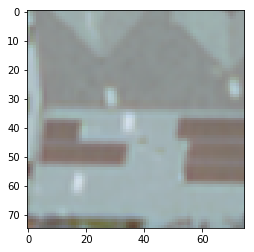

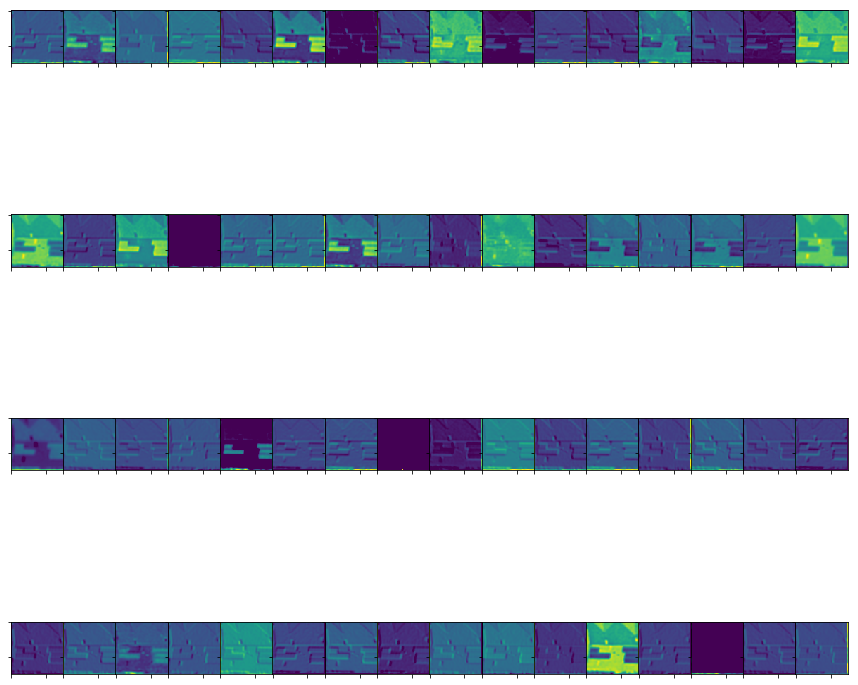

In [34]:
from keras.models import Model

def visualize_layer(output_img,columns=16):
    rows = output_img.shape[2] // columns

    fig, ax = plt.subplots(rows, columns, figsize=(15,15))
    i = 0    
    for r in range(rows):
        for c in range(columns):
            ax[r, c].imshow(output_img[:,:,i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    plt.subplots_adjust(wspace=0, hspace=0)
    

def model_until_layer(model, layer_name):
    layer = model.get_layer(layer_name)
    base_model = Model(model.input, layer.output)
    base_model.summary()
    return base_model



image = test_images[0] 
plt.imshow(image)

base_model = model_until_layer(model, "block1_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________
(1, 75, 75, 64)


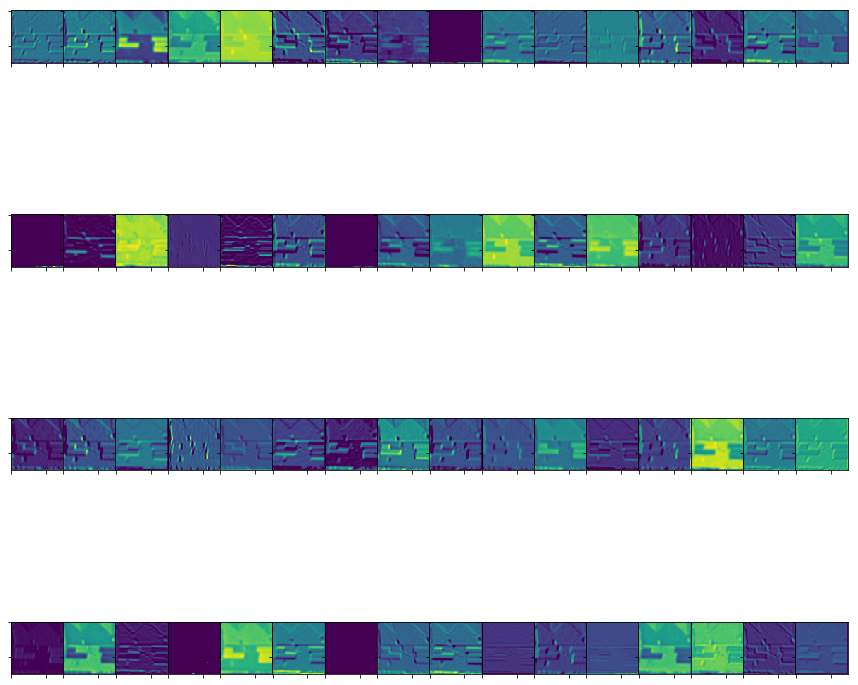

In [35]:
base_model = model_until_layer(model, "block1_conv2")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
Total params: 112,576
Trainable params: 0
Non-trainable params: 112,576
_________________________________________________________________
(1, 37, 37, 128)


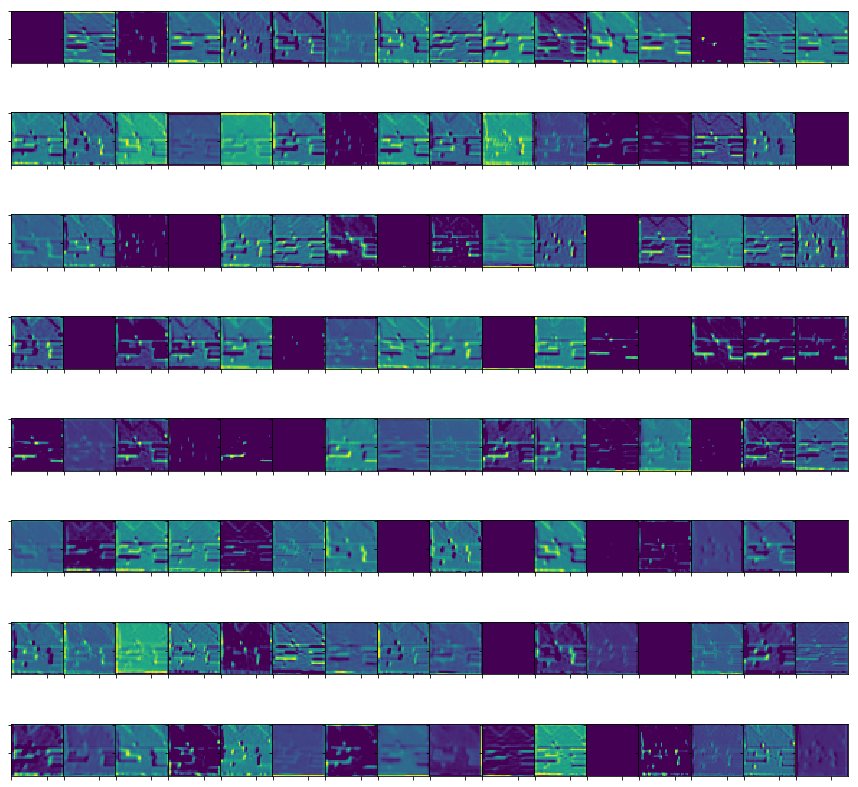

In [36]:
base_model = model_until_layer(model, "block2_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
Total params: 260,160
Trainable params: 0
Non-trainable params: 260,160
_________________________________________________________________
(1, 

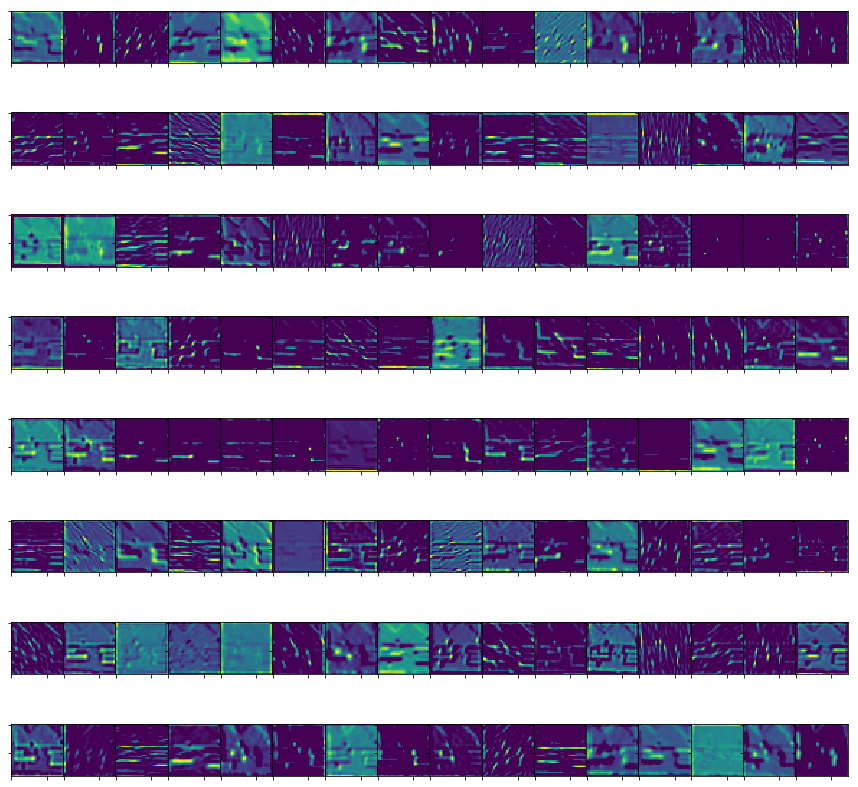

In [37]:
base_model = model_until_layer(model, "block2_conv2")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

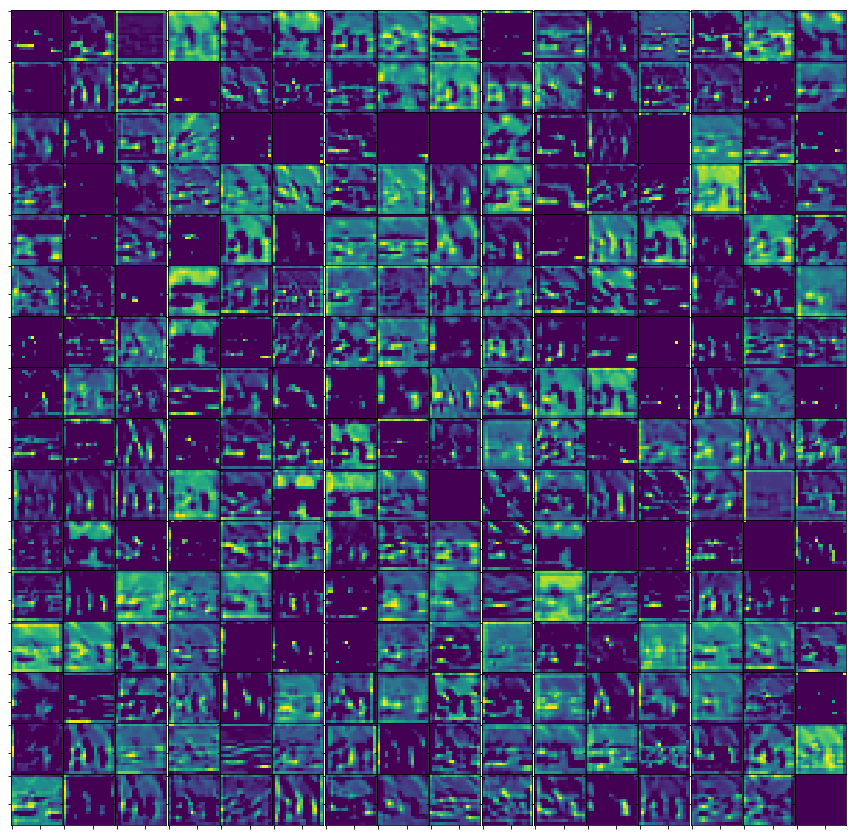

In [38]:
base_model = model_until_layer(model, "block3_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

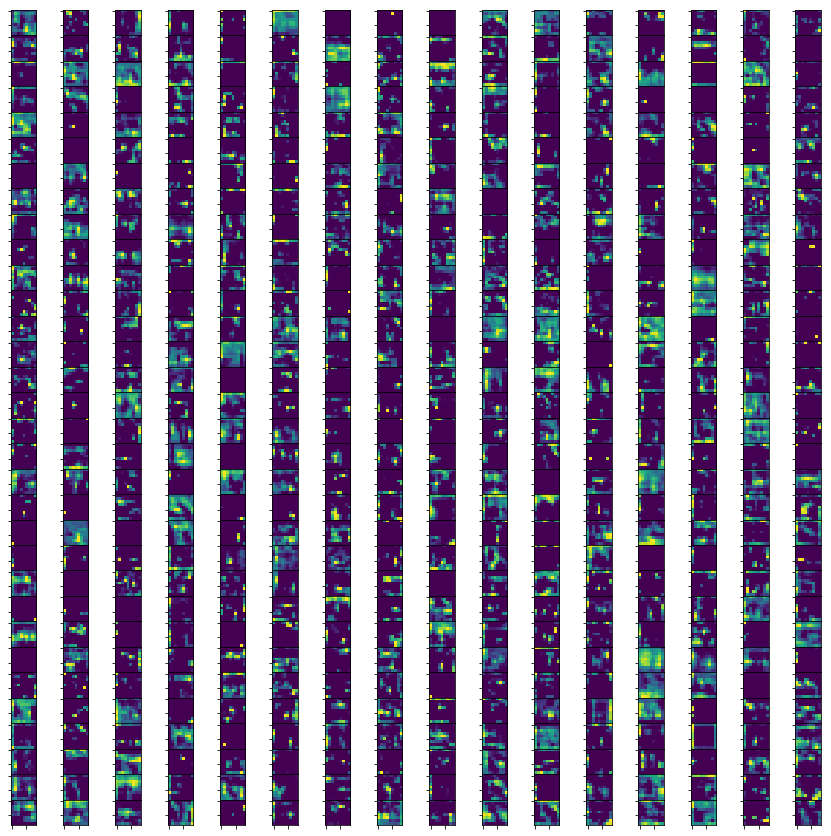

In [39]:
base_model = model_until_layer(model, "block4_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

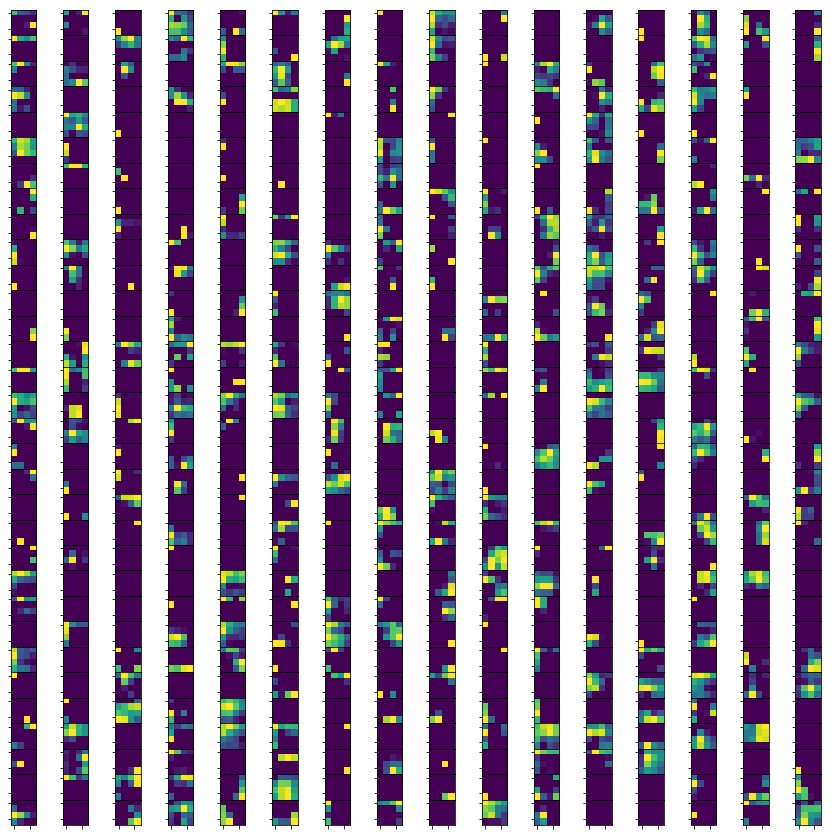

In [40]:
base_model = model_until_layer(model, "block5_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

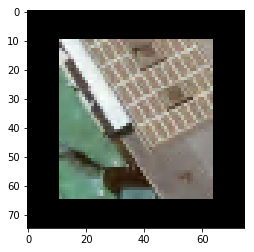

In [51]:
ac_image = ac_dataset[1].images[5]
plt.imshow(ac_image)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
Total params: 112,576
Trainable params: 0
Non-trainable params: 112,576
_________________________________________________________________
(1, 37, 37, 128)


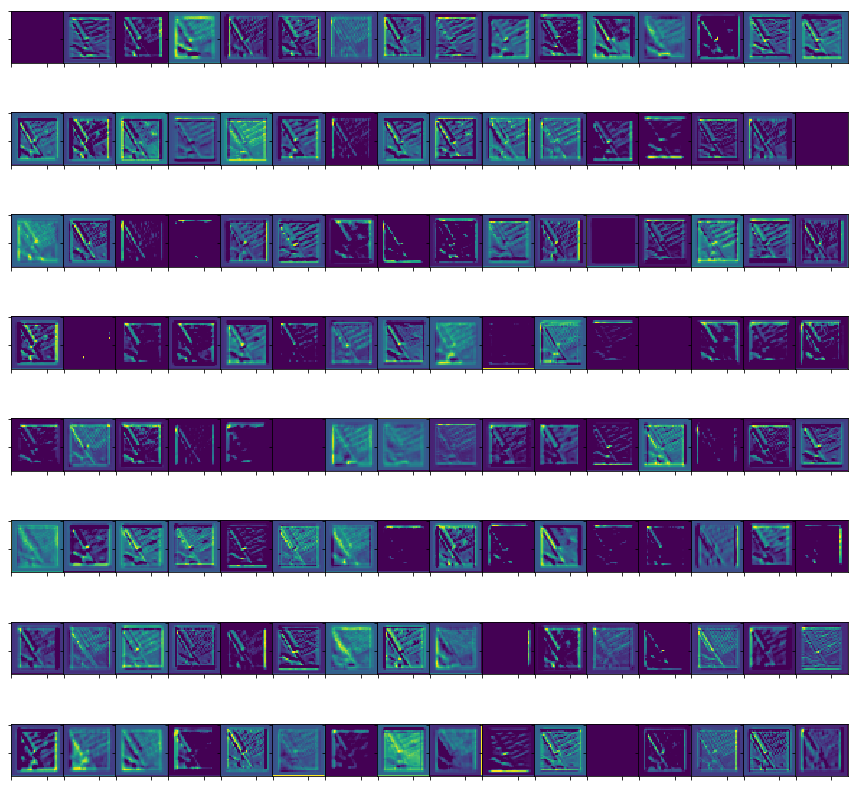

In [52]:
base_model = model_until_layer(model, "block2_conv1")
batch_input = np.expand_dims(ac_image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

# Activation Maximization

In [ ]:
import importlib
import VisualizeNetwork
importlib.reload(VisualizeNetwork)

from VisualizeNetwork import visualize_all_layers


visualize_all_layers(model)

Processing filter 0
Current loss value: 9.88394
Current loss value: 11.8572
Current loss value: 13.9148
Current loss value: 16.0275
Current loss value: 18.1803
Current loss value: 20.3594
Current loss value: 22.5593
Current loss value: 24.775
Current loss value: 27.003
Current loss value: 29.2426
Current loss value: 31.4922
Current loss value: 33.7499
Current loss value: 36.0162
Current loss value: 38.2881
Current loss value: 40.5649
Current loss value: 42.8467
Current loss value: 45.1324
Current loss value: 47.4212
Current loss value: 49.7144
Current loss value: 52.0098
Filter 0 processed in 0s
Processing filter 1
Current loss value: 28.4464
Current loss value: 32.0219
Current loss value: 35.5974
Current loss value: 39.1729
Current loss value: 42.7484
Current loss value: 46.3239
Current loss value: 49.8993
Current loss value: 53.4748
Current loss value: 57.0503
Current loss value: 60.6258
Current loss value: 64.2013
Current loss value: 67.7768
Current loss value: 71.3522
Current loss 

Current loss value: 132.943
Current loss value: 136.55
Current loss value: 140.158
Current loss value: 143.766
Current loss value: 147.374
Current loss value: 150.982
Current loss value: 154.59
Current loss value: 158.197
Filter 16 processed in 0s
Processing filter 17
Current loss value: 2.02013
Current loss value: 2.24202
Current loss value: 2.51622
Current loss value: 2.84656
Current loss value: 3.22391
Current loss value: 3.638
Current loss value: 4.08303
Current loss value: 4.55411
Current loss value: 5.05162
Current loss value: 5.57175
Current loss value: 6.11041
Current loss value: 6.66582
Current loss value: 7.23922
Current loss value: 7.83062
Current loss value: 8.43613
Current loss value: 9.05686
Current loss value: 9.68966
Current loss value: 10.3349
Current loss value: 10.9937
Current loss value: 11.6648
Filter 17 processed in 0s
Processing filter 18
Current loss value: 13.3453
Current loss value: 17.922
Current loss value: 22.51
Current loss value: 27.1016
Current loss valu

Current loss value: 382.703
Current loss value: 385.69
Current loss value: 388.677
Current loss value: 391.664
Current loss value: 394.651
Current loss value: 397.638
Current loss value: 400.625
Current loss value: 403.612
Current loss value: 406.599
Current loss value: 409.586
Current loss value: 412.573
Current loss value: 415.56
Current loss value: 418.547
Current loss value: 421.534
Current loss value: 424.521
Current loss value: 427.508
Current loss value: 430.495
Current loss value: 433.482
Current loss value: 436.469
Current loss value: 439.456
Filter 31 processed in 0s
Processing filter 32
Current loss value: 0.0
Filter 32 processed in 0s
Processing filter 33
Current loss value: 38.984
Current loss value: 41.0058
Current loss value: 43.0276
Current loss value: 45.0494
Current loss value: 47.0712
Current loss value: 49.093
Current loss value: 51.1148
Current loss value: 53.1366
Current loss value: 55.1584
Current loss value: 57.1802
Current loss value: 59.202
Current loss value:

Current loss value: 8.64192
Current loss value: 10.7457
Current loss value: 12.8764
Current loss value: 15.0228
Current loss value: 17.1805
Current loss value: 19.3471
Current loss value: 21.5195
Current loss value: 23.6978
Current loss value: 25.8804
Current loss value: 28.0663
Current loss value: 30.2556
Current loss value: 32.4475
Current loss value: 34.6415
Current loss value: 36.8375
Current loss value: 39.0352
Current loss value: 41.2342
Current loss value: 43.4347
Current loss value: 45.6361
Current loss value: 47.8383
Current loss value: 50.0415
Filter 49 processed in 0s
Processing filter 50
Current loss value: 0.602422
Current loss value: 2.08162
Current loss value: 4.07582
Current loss value: 6.40123
Current loss value: 8.9664
Current loss value: 11.708
Current loss value: 14.5771
Current loss value: 17.544
Current loss value: 20.5867
Current loss value: 23.6811
Current loss value: 26.8096
Current loss value: 29.9621
Current loss value: 33.1289
Current loss value: 36.3063
Cur

Current loss value: 141.82
Current loss value: 145.32
Current loss value: 149.102
Current loss value: 153.064
Current loss value: 157.209
Current loss value: 161.717
Current loss value: 166.779
Current loss value: 172.471
Current loss value: 178.779
Current loss value: 185.584
Current loss value: 192.818
Current loss value: 200.434
Current loss value: 208.364
Current loss value: 216.582
Current loss value: 225.045
Current loss value: 233.728
Current loss value: 242.618
Current loss value: 251.687
Current loss value: 260.91
Current loss value: 270.269
Filter 0 processed in 0s
Processing filter 1
Current loss value: 69.0765
Current loss value: 70.6173
Current loss value: 72.1544
Current loss value: 73.7129
Current loss value: 75.2796
Current loss value: 76.845
Current loss value: 78.4076
Current loss value: 79.9713
Current loss value: 81.5446
Current loss value: 83.1309
Current loss value: 84.7418
Current loss value: 86.3806
Current loss value: 88.0552
Current loss value: 89.7691
Current

Current loss value: 16.7567
Current loss value: 18.7937
Current loss value: 20.5233
Current loss value: 21.9917
Current loss value: 23.2792
Current loss value: 24.4598
Current loss value: 25.5838
Current loss value: 26.6769
Current loss value: 27.7333
Current loss value: 28.7118
Current loss value: 29.6372
Current loss value: 30.701
Current loss value: 32.0551
Current loss value: 33.6742
Current loss value: 35.4401
Current loss value: 37.2579
Current loss value: 39.09
Current loss value: 40.9262
Current loss value: 42.765
Current loss value: 44.6063
Filter 14 processed in 0s
Processing filter 15
Current loss value: 48.7379
Current loss value: 67.4941
Current loss value: 87.1812
Current loss value: 107.044
Current loss value: 126.75
Current loss value: 146.424
Current loss value: 166.336
Current loss value: 186.664
Current loss value: 207.497
Current loss value: 228.901
Current loss value: 250.868
Current loss value: 273.281
Current loss value: 296.0
Current loss value: 318.902
Current 

Current loss value: 33.7231
Current loss value: 44.0295
Current loss value: 55.0769
Current loss value: 66.4784
Current loss value: 78.1189
Current loss value: 89.9468
Current loss value: 101.994
Current loss value: 114.332
Current loss value: 126.986
Current loss value: 139.907
Current loss value: 153.047
Current loss value: 166.363
Current loss value: 179.819
Current loss value: 193.388
Current loss value: 207.052
Current loss value: 220.797
Current loss value: 234.611
Current loss value: 248.479
Current loss value: 262.391
Current loss value: 276.344
Filter 29 processed in 0s
Processing filter 30
Current loss value: 13.0232
Current loss value: 20.0804
Current loss value: 27.4704
Current loss value: 35.0008
Current loss value: 42.6449
Current loss value: 50.4241
Current loss value: 58.3608
Current loss value: 66.4555
Current loss value: 74.703
Current loss value: 83.092
Current loss value: 91.6103
Current loss value: 100.24
Current loss value: 108.964
Current loss value: 117.773
Curr

Current loss value: 42.7689
Current loss value: 46.4588
Current loss value: 51.0901
Current loss value: 56.3523
Current loss value: 62.0397
Current loss value: 68.0556
Current loss value: 74.3159
Current loss value: 80.7668
Current loss value: 87.3819
Current loss value: 94.138
Current loss value: 101.01
Current loss value: 107.99
Current loss value: 115.063
Current loss value: 122.218
Current loss value: 129.441
Current loss value: 136.723
Current loss value: 144.054
Current loss value: 151.433
Current loss value: 158.855
Current loss value: 166.319
Filter 43 processed in 0s
Processing filter 44
Current loss value: 36.5149
Current loss value: 40.502
Current loss value: 45.2146
Current loss value: 50.4437
Current loss value: 56.0312
Current loss value: 61.8877
Current loss value: 67.9733
Current loss value: 74.2505
Current loss value: 80.6984
Current loss value: 87.2959
Current loss value: 94.0088
Current loss value: 100.825
Current loss value: 107.72
Current loss value: 114.687
Curren

Current loss value: 110.556
Current loss value: 118.389
Current loss value: 126.358
Current loss value: 134.448
Current loss value: 142.649
Current loss value: 150.941
Current loss value: 159.316
Current loss value: 167.76
Filter 56 processed in 0s
Processing filter 57
Current loss value: 21.0128
Current loss value: 27.9567
Current loss value: 35.3368
Current loss value: 42.8799
Current loss value: 50.5177
Current loss value: 58.2327
Current loss value: 66.0362
Current loss value: 73.9352
Current loss value: 81.9273
Current loss value: 90.0164
Current loss value: 98.2178
Current loss value: 106.537
Current loss value: 114.98
Current loss value: 123.547
Current loss value: 132.231
Current loss value: 141.017
Current loss value: 149.897
Current loss value: 158.853
Current loss value: 167.878
Current loss value: 176.966
Filter 57 processed in 0s
Processing filter 58
Current loss value: 43.9443
Current loss value: 48.1699
Current loss value: 53.1942
Current loss value: 58.8769
Current loss

Current loss value: 228.906
Current loss value: 243.766
Current loss value: 258.69
Current loss value: 273.666
Current loss value: 288.698
Current loss value: 303.765
Current loss value: 318.868
Current loss value: 334.007
Filter 6 processed in 0s
Processing filter 7
Current loss value: 3.69157
Current loss value: 6.26979
Current loss value: 10.216
Current loss value: 15.0805
Current loss value: 20.538
Current loss value: 26.4611
Current loss value: 32.7374
Current loss value: 39.2591
Current loss value: 46.0143
Current loss value: 53.0179
Current loss value: 60.2344
Current loss value: 67.6433
Current loss value: 75.2401
Current loss value: 83.0451
Current loss value: 91.005
Current loss value: 99.1314
Current loss value: 107.463
Current loss value: 115.98
Current loss value: 124.64
Current loss value: 133.418
Filter 7 processed in 0s
Processing filter 8
Current loss value: 18.8602
Current loss value: 21.1726
Current loss value: 23.6968
Current loss value: 26.318
Current loss value: 2

Current loss value: 36.9236
Current loss value: 47.1322
Current loss value: 57.6864
Current loss value: 68.3001
Current loss value: 78.9092
Current loss value: 89.5756
Current loss value: 100.354
Current loss value: 111.247
Current loss value: 122.267
Current loss value: 133.438
Current loss value: 144.724
Current loss value: 156.103
Current loss value: 167.535
Current loss value: 179.012
Current loss value: 190.527
Current loss value: 202.078
Current loss value: 213.669
Current loss value: 225.29
Current loss value: 236.943
Current loss value: 248.615
Filter 21 processed in 0s
Processing filter 22
Current loss value: 9.23751
Current loss value: 10.0156
Current loss value: 10.8329
Current loss value: 11.6715
Current loss value: 12.5255
Current loss value: 13.3908
Current loss value: 14.2645
Current loss value: 15.1478
Current loss value: 16.0446
Current loss value: 16.9919
Current loss value: 18.0233
Current loss value: 19.1377
Current loss value: 20.3789
Current loss value: 21.7294
Cu

Current loss value: 28.6806
Current loss value: 44.2926
Current loss value: 59.9611
Current loss value: 75.5381
Current loss value: 91.0637
Current loss value: 106.608
Current loss value: 122.261
Current loss value: 138.056
Current loss value: 154.021
Current loss value: 170.133
Current loss value: 186.375
Current loss value: 202.716
Current loss value: 219.142
Current loss value: 235.645
Current loss value: 252.223
Current loss value: 268.861
Current loss value: 285.566
Current loss value: 302.344
Current loss value: 319.205
Current loss value: 336.155
Filter 35 processed in 0s
Processing filter 36
Current loss value: 19.6026
Current loss value: 23.0367
Current loss value: 27.6093
Current loss value: 32.8498
Current loss value: 38.5069
Current loss value: 44.5159
Current loss value: 50.847
Current loss value: 57.4619
Current loss value: 64.3258
Current loss value: 71.406
Current loss value: 78.6931
Current loss value: 86.1723
Current loss value: 93.8286
Current loss value: 101.641
Cur

Current loss value: 115.429
Current loss value: 131.03
Current loss value: 145.669
Current loss value: 159.331
Current loss value: 172.54
Current loss value: 186.155
Current loss value: 200.538
Current loss value: 215.597
Current loss value: 231.174
Current loss value: 247.124
Current loss value: 263.349
Current loss value: 279.77
Current loss value: 296.339
Current loss value: 313.035
Current loss value: 329.848
Current loss value: 346.78
Current loss value: 363.841
Current loss value: 381.04
Current loss value: 398.358
Current loss value: 415.797
Filter 49 processed in 0s
Processing filter 50
Current loss value: 55.4618
Current loss value: 75.8423
Current loss value: 97.2894
Current loss value: 119.288
Current loss value: 141.711
Current loss value: 164.507
Current loss value: 187.682
Current loss value: 211.199
Current loss value: 235.034
Current loss value: 259.198
Current loss value: 283.722
Current loss value: 308.632
Current loss value: 333.923
Current loss value: 359.549
Curren

Current loss value: 13.8716
Current loss value: 15.9662
Current loss value: 19.1178
Current loss value: 23.1918
Current loss value: 27.8973
Current loss value: 33.03
Current loss value: 38.5017
Current loss value: 44.2452
Current loss value: 50.2776
Current loss value: 56.5853
Current loss value: 63.1572
Current loss value: 69.981
Current loss value: 77.0442
Current loss value: 84.3387
Current loss value: 91.8224
Current loss value: 99.5108
Current loss value: 107.394
Current loss value: 115.488
Current loss value: 123.781
Current loss value: 132.277
Filter 63 processed in 0s
filter_width=16, filter_height=4, number_of_filters=64
width=2123, height=527
Processing filter 0
Current loss value: 0.0
Filter 0 processed in 0s
Processing filter 1
Current loss value: 126.349
Current loss value: 142.812
Current loss value: 153.89
Current loss value: 161.194
Current loss value: 168.251
Current loss value: 174.899
Current loss value: 181.685
Current loss value: 188.484
Current loss value: 195.652

Current loss value: 288.609
Current loss value: 313.093
Current loss value: 336.333
Current loss value: 359.199
Current loss value: 382.015
Current loss value: 404.622
Current loss value: 427.113
Current loss value: 449.579
Current loss value: 472.175
Current loss value: 495.064
Current loss value: 518.192
Current loss value: 541.614
Current loss value: 565.392
Current loss value: 589.416
Current loss value: 613.535
Current loss value: 637.602
Current loss value: 661.566
Current loss value: 685.26
Current loss value: 708.657
Current loss value: 731.672
Filter 15 processed in 0s
Processing filter 16
Current loss value: 245.867
Current loss value: 260.852
Current loss value: 274.25
Current loss value: 286.861
Current loss value: 299.177
Current loss value: 311.346
Current loss value: 323.416
Current loss value: 335.485
Current loss value: 347.657
Current loss value: 359.808
Current loss value: 372.011
Current loss value: 384.187
Current loss value: 396.378
Current loss value: 408.633
Cur

Current loss value: 181.78
Current loss value: 194.668
Current loss value: 202.754
Current loss value: 206.315
Current loss value: 209.104
Current loss value: 211.396
Current loss value: 213.613
Current loss value: 215.713
Current loss value: 217.804
Current loss value: 219.94
Current loss value: 222.066
Current loss value: 224.283
Current loss value: 226.507
Current loss value: 228.894
Current loss value: 231.369
Current loss value: 233.991
Current loss value: 236.982
Current loss value: 240.066
Current loss value: 243.647
Current loss value: 247.613
Filter 29 processed in 0s
Processing filter 30
Current loss value: 260.501
Current loss value: 295.922
Current loss value: 320.048
Current loss value: 332.323
Current loss value: 345.266
Current loss value: 356.773
Current loss value: 369.182
Current loss value: 381.103
Current loss value: 393.488
Current loss value: 405.962
Current loss value: 418.795
Current loss value: 431.968
Current loss value: 445.521
Current loss value: 459.51
Curr

Current loss value: 208.093
Current loss value: 237.17
Current loss value: 267.185
Current loss value: 298.014
Current loss value: 329.664
Current loss value: 362.055
Current loss value: 395.076
Current loss value: 428.592
Current loss value: 462.512
Current loss value: 496.747
Current loss value: 531.227
Current loss value: 565.91
Current loss value: 600.677
Current loss value: 635.401
Current loss value: 670.007
Current loss value: 704.424
Current loss value: 738.63
Current loss value: 772.638
Current loss value: 806.398
Current loss value: 839.909
Filter 45 processed in 0s
Processing filter 46
Current loss value: 183.169
Current loss value: 211.654
Current loss value: 239.251
Current loss value: 266.255
Current loss value: 293.098
Current loss value: 320.01
Current loss value: 347.264
Current loss value: 375.015
Current loss value: 403.492
Current loss value: 432.608
Current loss value: 462.33
Current loss value: 492.434
Current loss value: 522.758
Current loss value: 553.14
Current

Current loss value: 0.0
Filter 60 processed in 0s
Processing filter 61
Current loss value: 234.386
Current loss value: 258.198
Current loss value: 279.472
Current loss value: 300.247
Current loss value: 321.115
Current loss value: 342.189
Current loss value: 363.463
Current loss value: 385.078
Current loss value: 406.964
Current loss value: 429.037
Current loss value: 451.263
Current loss value: 473.648
Current loss value: 496.105
Current loss value: 518.673
Current loss value: 541.319
Current loss value: 563.982
Current loss value: 586.569
Current loss value: 609.038
Current loss value: 631.525
Current loss value: 653.98
Filter 61 processed in 0s
Processing filter 62
Current loss value: 165.722
Current loss value: 182.068
Current loss value: 194.735
Current loss value: 204.944
Current loss value: 213.846
Current loss value: 222.916
Current loss value: 231.875
Current loss value: 240.949
Current loss value: 250.206
Current loss value: 259.799
Current loss value: 269.607
Current loss va

Current loss value: 222.391
Current loss value: 254.497
Current loss value: 285.837
Current loss value: 316.506
Current loss value: 346.908
Current loss value: 377.5
Current loss value: 408.667
Current loss value: 440.616
Current loss value: 473.118
Current loss value: 506.176
Current loss value: 539.755
Current loss value: 573.743
Current loss value: 608.054
Current loss value: 642.468
Current loss value: 676.954
Current loss value: 711.404
Current loss value: 745.905
Current loss value: 780.373
Current loss value: 814.739
Current loss value: 848.959
Filter 76 processed in 0s
Processing filter 77
Current loss value: 221.821
Current loss value: 234.632
Current loss value: 243.443
Current loss value: 247.799
Current loss value: 250.613
Current loss value: 253.932
Current loss value: 256.482
Current loss value: 259.517
Current loss value: 261.981
Current loss value: 264.873
Current loss value: 267.288
Current loss value: 270.073
Current loss value: 272.486
Current loss value: 275.213
Cur

Current loss value: 174.347
Current loss value: 188.469
Current loss value: 202.332
Current loss value: 216.101
Current loss value: 229.818
Current loss value: 243.669
Current loss value: 257.667
Current loss value: 271.694
Current loss value: 285.863
Current loss value: 300.205
Current loss value: 314.674
Current loss value: 329.267
Current loss value: 344.021
Current loss value: 358.91
Current loss value: 373.866
Current loss value: 388.905
Current loss value: 403.996
Current loss value: 419.127
Current loss value: 434.277
Current loss value: 449.404
Filter 90 processed in 0s
Processing filter 91
Current loss value: 16.8005
Current loss value: 19.7598
Current loss value: 23.405
Current loss value: 28.3402
Current loss value: 33.7891
Current loss value: 39.7936
Current loss value: 46.3599
Current loss value: 53.3569
Current loss value: 60.7735
Current loss value: 68.5334
Current loss value: 76.5362
Current loss value: 84.8056
Current loss value: 93.3387
Current loss value: 102.078
Cur

Current loss value: 116.592
Current loss value: 132.92
Current loss value: 150.055
Current loss value: 168.097
Current loss value: 186.919
Current loss value: 206.724
Current loss value: 227.287
Current loss value: 248.271
Current loss value: 269.485
Current loss value: 290.861
Current loss value: 312.357
Current loss value: 333.961
Current loss value: 355.668
Current loss value: 377.489
Current loss value: 399.467
Current loss value: 421.554
Current loss value: 443.831
Current loss value: 466.229
Current loss value: 488.743
Current loss value: 511.438
Filter 104 processed in 0s
Processing filter 105
Current loss value: 0.0
Filter 105 processed in 0s
Processing filter 106
Current loss value: 123.255
Current loss value: 147.121
Current loss value: 163.185
Current loss value: 172.638
Current loss value: 181.256
Current loss value: 189.642
Current loss value: 197.856
Current loss value: 206.153
Current loss value: 214.484
Current loss value: 223.053
Current loss value: 231.551
Current los

Current loss value: 57.8745
Current loss value: 84.9502
Current loss value: 111.737
Current loss value: 137.635
Current loss value: 162.607
Current loss value: 186.734
Current loss value: 210.068
Current loss value: 233.011
Current loss value: 256.039
Current loss value: 279.342
Current loss value: 302.687
Current loss value: 325.626
Current loss value: 347.994
Current loss value: 369.959
Current loss value: 391.837
Current loss value: 413.765
Current loss value: 435.764
Current loss value: 457.853
Current loss value: 480.03
Current loss value: 502.293
Filter 120 processed in 0s
Processing filter 121
Current loss value: 2.71558
Current loss value: 8.98228
Current loss value: 17.5414
Current loss value: 27.6183
Current loss value: 38.6899
Current loss value: 50.5605
Current loss value: 63.1411
Current loss value: 76.2659
Current loss value: 89.8363
Current loss value: 103.77
Current loss value: 118.02
Current loss value: 132.558
Current loss value: 147.292
Current loss value: 162.222
Cu

Current loss value: 33.7453
Current loss value: 113.248
Current loss value: 193.923
Current loss value: 269.135
Current loss value: 335.674
Current loss value: 394.6
Current loss value: 448.248
Current loss value: 497.824
Current loss value: 544.432
Current loss value: 588.897
Current loss value: 631.717
Current loss value: 673.087
Current loss value: 713.371
Current loss value: 752.529
Current loss value: 790.793
Current loss value: 828.442
Current loss value: 865.59
Current loss value: 902.334
Current loss value: 938.704
Current loss value: 974.723
Filter 7 processed in 0s
Processing filter 8
Current loss value: 32.2686
Current loss value: 123.117
Current loss value: 217.545
Current loss value: 304.903
Current loss value: 381.74
Current loss value: 449.198
Current loss value: 509.635
Current loss value: 565.68
Current loss value: 618.719
Current loss value: 669.633
Current loss value: 719.095
Current loss value: 767.382
Current loss value: 814.494
Current loss value: 860.927
Current 

Current loss value: 49.3379
Current loss value: 88.2199
Current loss value: 129.975
Current loss value: 171.827
Current loss value: 211.996
Current loss value: 250.265
Current loss value: 286.929
Current loss value: 321.954
Current loss value: 355.748
Current loss value: 388.787
Current loss value: 421.206
Current loss value: 453.386
Current loss value: 485.279
Current loss value: 517.211
Current loss value: 548.654
Current loss value: 580.328
Current loss value: 611.128
Current loss value: 642.039
Current loss value: 672.282
Current loss value: 702.526
Filter 21 processed in 0s
Processing filter 22
Current loss value: 47.3288
Current loss value: 79.8702
Current loss value: 113.798
Current loss value: 147.089
Current loss value: 179.659
Current loss value: 211.858
Current loss value: 243.441
Current loss value: 274.511
Current loss value: 305.416
Current loss value: 335.961
Current loss value: 366.142
Current loss value: 395.721
Current loss value: 425.011
Current loss value: 453.372
C

Current loss value: 251.29
Current loss value: 290.19
Current loss value: 329.948
Current loss value: 370.075
Current loss value: 409.822
Current loss value: 449.124
Current loss value: 488.013
Current loss value: 526.654
Current loss value: 565.227
Current loss value: 603.571
Current loss value: 641.594
Current loss value: 679.122
Current loss value: 715.928
Current loss value: 751.97
Current loss value: 787.295
Current loss value: 821.866
Current loss value: 855.619
Current loss value: 888.63
Current loss value: 920.96
Current loss value: 952.649
Filter 35 processed in 0s
Processing filter 36
Current loss value: 338.194
Current loss value: 374.791
Current loss value: 402.389
Current loss value: 414.276
Current loss value: 418.1
Current loss value: 423.936
Current loss value: 426.775
Current loss value: 431.774
Current loss value: 434.184
Current loss value: 438.64
Current loss value: 440.803
Current loss value: 444.91
Current loss value: 446.948
Current loss value: 450.812
Current lo

Current loss value: 4.26729
Current loss value: 12.4625
Current loss value: 22.1545
Current loss value: 32.5249
Current loss value: 42.7241
Current loss value: 53.1931
Current loss value: 64.2641
Current loss value: 75.818
Current loss value: 87.7269
Current loss value: 100.0
Current loss value: 112.75
Current loss value: 125.8
Current loss value: 138.987
Current loss value: 152.293
Current loss value: 165.631
Current loss value: 179.332
Current loss value: 193.24
Current loss value: 207.281
Current loss value: 221.724
Current loss value: 236.462
Filter 49 processed in 0s
Processing filter 50
Current loss value: 53.6884
Current loss value: 115.891
Current loss value: 175.943
Current loss value: 233.813
Current loss value: 290.353
Current loss value: 346.457
Current loss value: 402.661
Current loss value: 459.24
Current loss value: 516.193
Current loss value: 573.352
Current loss value: 630.572
Current loss value: 687.605
Current loss value: 744.374
Current loss value: 800.888
Current l

Current loss value: 191.132
Current loss value: 265.358
Current loss value: 350.67
Current loss value: 437.18
Current loss value: 522.4
Current loss value: 606.136
Current loss value: 688.217
Current loss value: 768.753
Current loss value: 847.28
Current loss value: 924.493
Current loss value: 1000.83
Current loss value: 1076.39
Current loss value: 1151.21
Current loss value: 1225.34
Current loss value: 1298.97
Current loss value: 1372.3
Current loss value: 1445.3
Current loss value: 1518.04
Current loss value: 1590.57
Current loss value: 1662.87
Filter 63 processed in 0s
Processing filter 64
Current loss value: 116.515
Current loss value: 156.083
Current loss value: 195.568
Current loss value: 234.819
Current loss value: 274.104
Current loss value: 313.592
Current loss value: 353.365
Current loss value: 393.345
Current loss value: 433.49
Current loss value: 473.532
Current loss value: 512.506
Current loss value: 549.561
Current loss value: 584.879
Current loss value: 618.909
Current l

Current loss value: 69.7171
Current loss value: 142.397
Current loss value: 213.629
Current loss value: 280.453
Current loss value: 343.802
Current loss value: 405.257
Current loss value: 464.994
Current loss value: 523.74
Current loss value: 581.848
Current loss value: 639.721
Current loss value: 697.404
Current loss value: 755.044
Current loss value: 812.654
Current loss value: 870.193
Current loss value: 927.398
Current loss value: 984.304
Current loss value: 1040.91
Current loss value: 1097.19
Current loss value: 1153.18
Current loss value: 1208.97
Filter 77 processed in 0s
Processing filter 78
Current loss value: 97.891
Current loss value: 132.451
Current loss value: 166.387
Current loss value: 199.419
Current loss value: 231.555
Current loss value: 263.013
Current loss value: 293.964
Current loss value: 324.527
Current loss value: 354.7
Current loss value: 384.331
Current loss value: 413.283
Current loss value: 441.262
Current loss value: 468.066
Current loss value: 493.846
Curre

Current loss value: 33.7106
Current loss value: 64.8089
Current loss value: 100.894
Current loss value: 138.001
Current loss value: 174.639
Current loss value: 210.5
Current loss value: 245.766
Current loss value: 280.677
Current loss value: 315.653
Current loss value: 350.649
Current loss value: 385.701
Current loss value: 420.634
Current loss value: 455.341
Current loss value: 490.076
Current loss value: 524.89
Current loss value: 559.595
Current loss value: 594.167
Current loss value: 628.847
Current loss value: 663.628
Current loss value: 698.469
Filter 91 processed in 0s
Processing filter 92
Current loss value: 37.8062
Current loss value: 113.565
Current loss value: 191.834
Current loss value: 264.234
Current loss value: 329.221
Current loss value: 386.983
Current loss value: 438.787
Current loss value: 486.116
Current loss value: 530.268
Current loss value: 572.329
Current loss value: 612.912
Current loss value: 652.195
Current loss value: 690.276
Current loss value: 727.463
Curr

Current loss value: 32.7303
Current loss value: 115.536
Current loss value: 203.014
Current loss value: 286.075
Current loss value: 362.159
Current loss value: 431.47
Current loss value: 494.483
Current loss value: 552.433
Current loss value: 606.732
Current loss value: 657.982
Current loss value: 706.495
Current loss value: 753.036
Current loss value: 798.244
Current loss value: 842.478
Current loss value: 885.886
Current loss value: 928.791
Current loss value: 971.244
Current loss value: 1013.43
Current loss value: 1055.41
Current loss value: 1097.37
Filter 105 processed in 0s
Processing filter 106
Current loss value: 374.807
Current loss value: 399.861
Current loss value: 423.469
Current loss value: 446.53
Current loss value: 469.237
Current loss value: 491.492
Current loss value: 513.233
Current loss value: 534.379
Current loss value: 554.913
Current loss value: 574.889
Current loss value: 594.403
Current loss value: 613.437
Current loss value: 631.925
Current loss value: 649.694
C

Current loss value: 12.6891
Current loss value: 28.4245
Current loss value: 51.2627
Current loss value: 77.495
Current loss value: 105.716
Current loss value: 135.103
Current loss value: 165.299
Current loss value: 196.68
Current loss value: 229.453
Current loss value: 263.251
Current loss value: 297.898
Current loss value: 333.45
Current loss value: 369.316
Current loss value: 405.756
Current loss value: 442.521
Current loss value: 479.828
Current loss value: 517.353
Current loss value: 555.368
Current loss value: 593.905
Current loss value: 632.67
Filter 119 processed in 0s
Processing filter 120
Current loss value: 18.6489
Current loss value: 56.8696
Current loss value: 98.8038
Current loss value: 139.997
Current loss value: 179.333
Current loss value: 216.841
Current loss value: 252.63
Current loss value: 287.168
Current loss value: 321.033
Current loss value: 354.397
Current loss value: 387.368
Current loss value: 420.006
Current loss value: 452.362
Current loss value: 484.415
Curr

Current loss value: 104.273
Current loss value: 259.929
Current loss value: 420.165
Current loss value: 573.089
Current loss value: 715.814
Current loss value: 849.918
Current loss value: 977.282
Current loss value: 1099.19
Current loss value: 1216.8
Current loss value: 1331.54
Current loss value: 1443.41
Current loss value: 1552.85
Current loss value: 1660.34
Current loss value: 1766.12
Current loss value: 1870.48
Current loss value: 1973.43
Current loss value: 2074.8
Current loss value: 2174.98
Current loss value: 2273.86
Current loss value: 2371.5
Filter 5 processed in 0s
Processing filter 6
Current loss value: 175.192
Current loss value: 294.106
Current loss value: 417.549
Current loss value: 536.941
Current loss value: 649.796
Current loss value: 757.472
Current loss value: 861.649
Current loss value: 962.982
Current loss value: 1062.47
Current loss value: 1160.06
Current loss value: 1255.87
Current loss value: 1349.87
Current loss value: 1442.74
Current loss value: 1534.8
Current

Current loss value: 177.762
Current loss value: 391.048
Current loss value: 601.149
Current loss value: 799.736
Current loss value: 982.719
Current loss value: 1149.73
Current loss value: 1302.83
Current loss value: 1444.77
Current loss value: 1577.69
Current loss value: 1705.09
Current loss value: 1827.42
Current loss value: 1945.35
Current loss value: 2060.03
Current loss value: 2171.4
Current loss value: 2280.48
Current loss value: 2387.16
Current loss value: 2491.69
Current loss value: 2594.38
Current loss value: 2695.05
Current loss value: 2793.78
Filter 19 processed in 0s
Processing filter 20
Current loss value: 373.435
Current loss value: 529.307
Current loss value: 685.201
Current loss value: 835.73
Current loss value: 981.615
Current loss value: 1125.46
Current loss value: 1268.66
Current loss value: 1411.68
Current loss value: 1554.22
Current loss value: 1696.45
Current loss value: 1837.94
Current loss value: 1978.73
Current loss value: 2118.96
Current loss value: 2259.2
Curr

Current loss value: 962.039
Current loss value: 1142.23
Current loss value: 1285.4
Current loss value: 1401.81
Current loss value: 1514.83
Current loss value: 1616.52
Current loss value: 1711.61
Current loss value: 1799.55
Current loss value: 1883.66
Current loss value: 1964.55
Current loss value: 2043.26
Current loss value: 2120.33
Current loss value: 2197.93
Current loss value: 2273.42
Current loss value: 2349.76
Current loss value: 2425.26
Current loss value: 2501.84
Current loss value: 2577.91
Current loss value: 2654.91
Current loss value: 2731.39
Filter 33 processed in 0s
Processing filter 34
Current loss value: 106.476
Current loss value: 258.559
Current loss value: 407.72
Current loss value: 543.989
Current loss value: 665.861
Current loss value: 775.307
Current loss value: 875.237
Current loss value: 968.153
Current loss value: 1055.44
Current loss value: 1138.28
Current loss value: 1217.3
Current loss value: 1293.37
Current loss value: 1367.33
Current loss value: 1439.57
Curr

Current loss value: 121.61
Current loss value: 255.518
Current loss value: 403.985
Current loss value: 555.539
Current loss value: 704.639
Current loss value: 849.529
Current loss value: 990.614
Current loss value: 1128.51
Current loss value: 1263.56
Current loss value: 1396.6
Current loss value: 1527.88
Current loss value: 1658.13
Current loss value: 1787.35
Current loss value: 1915.65
Current loss value: 2043.22
Current loss value: 2170.3
Current loss value: 2296.85
Current loss value: 2422.9
Current loss value: 2548.45
Current loss value: 2673.44
Filter 47 processed in 0s
Processing filter 48
Current loss value: 120.008
Current loss value: 278.139
Current loss value: 434.66
Current loss value: 582.068
Current loss value: 723.907
Current loss value: 862.248
Current loss value: 998.38
Current loss value: 1133.49
Current loss value: 1268.07
Current loss value: 1402.54
Current loss value: 1537.12
Current loss value: 1672.02
Current loss value: 1807.8
Current loss value: 1944.11
Current 

Current loss value: 66.7933
Current loss value: 252.009
Current loss value: 437.052
Current loss value: 606.066
Current loss value: 754.808
Current loss value: 886.001
Current loss value: 1002.46
Current loss value: 1109.18
Current loss value: 1208.97
Current loss value: 1304.08
Current loss value: 1396.26
Current loss value: 1485.84
Current loss value: 1574.05
Current loss value: 1660.82
Current loss value: 1746.35
Current loss value: 1831.0
Current loss value: 1914.86
Current loss value: 1998.05
Current loss value: 2080.91
Current loss value: 2162.94
Filter 61 processed in 0s
Processing filter 62
Current loss value: 21.3333
Current loss value: 41.441
Current loss value: 62.8569
Current loss value: 83.6584
Current loss value: 103.565
Current loss value: 122.777
Current loss value: 141.4
Current loss value: 159.499
Current loss value: 177.467
Current loss value: 196.291
Current loss value: 216.228
Current loss value: 236.659
Current loss value: 256.651
Current loss value: 276.657
Curre

Current loss value: 211.532
Current loss value: 289.326
Current loss value: 361.392
Current loss value: 430.945
Current loss value: 501.14
Current loss value: 571.162
Current loss value: 642.274
Current loss value: 713.813
Current loss value: 785.606
Current loss value: 857.714
Current loss value: 930.776
Current loss value: 1004.22
Current loss value: 1077.7
Current loss value: 1151.48
Current loss value: 1225.08
Current loss value: 1298.72
Current loss value: 1372.0
Current loss value: 1445.74
Current loss value: 1519.09
Current loss value: 1592.61
Filter 75 processed in 0s
Processing filter 76
Current loss value: 15.6392
Current loss value: 19.8605
Current loss value: 23.7602
Current loss value: 27.5147
Current loss value: 31.5835
Current loss value: 35.7012
Current loss value: 40.2849
Current loss value: 45.1645
Current loss value: 50.259
Current loss value: 55.682
Current loss value: 61.4253
Current loss value: 67.4383
Current loss value: 73.6561
Current loss value: 80.0843
Curren

Current loss value: 111.572
Current loss value: 218.98
Current loss value: 333.291
Current loss value: 448.134
Current loss value: 561.191
Current loss value: 670.169
Current loss value: 775.4
Current loss value: 878.737
Current loss value: 980.588
Current loss value: 1081.22
Current loss value: 1180.4
Current loss value: 1278.66
Current loss value: 1376.39
Current loss value: 1473.45
Current loss value: 1569.84
Current loss value: 1665.69
Current loss value: 1761.0
Current loss value: 1856.06
Current loss value: 1951.02
Current loss value: 2045.84
Filter 89 processed in 0s
Processing filter 90
Current loss value: 110.074
Current loss value: 205.903
Current loss value: 294.839
Current loss value: 374.523
Current loss value: 449.283
Current loss value: 521.057
Current loss value: 590.497
Current loss value: 658.2
Current loss value: 724.574
Current loss value: 789.968
Current loss value: 854.725
Current loss value: 918.954
Current loss value: 982.89
Current loss value: 1046.69
Current l

Current loss value: 391.341
Current loss value: 514.723
Current loss value: 636.933
Current loss value: 756.519
Current loss value: 873.002
Current loss value: 982.661
Current loss value: 1088.48
Current loss value: 1189.21
Current loss value: 1287.16
Current loss value: 1381.28
Current loss value: 1472.96
Current loss value: 1562.01
Current loss value: 1648.32
Current loss value: 1731.88
Current loss value: 1814.51
Current loss value: 1894.51
Current loss value: 1974.41
Current loss value: 2052.1
Current loss value: 2129.53
Current loss value: 2206.09
Filter 103 processed in 0s
Processing filter 104
Current loss value: 470.944
Current loss value: 547.066
Current loss value: 601.718
Current loss value: 642.564
Current loss value: 684.736
Current loss value: 722.768
Current loss value: 763.313
Current loss value: 801.967
Current loss value: 843.965
Current loss value: 885.06
Current loss value: 929.08
Current loss value: 972.109
Current loss value: 1016.8
Current loss value: 1060.42
Cur

Current loss value: 49.2281
Current loss value: 118.676
Current loss value: 206.817
Current loss value: 300.007
Current loss value: 395.975
Current loss value: 494.246
Current loss value: 594.351
Current loss value: 695.42
Current loss value: 796.341
Current loss value: 897.798
Current loss value: 999.445
Current loss value: 1101.48
Current loss value: 1203.25
Current loss value: 1305.77
Current loss value: 1407.87
Current loss value: 1509.35
Current loss value: 1610.41
Current loss value: 1711.38
Current loss value: 1812.67
Current loss value: 1914.07
Filter 117 processed in 0s
Processing filter 118
Current loss value: 81.1322
Current loss value: 162.103
Current loss value: 241.807
Current loss value: 316.799
Current loss value: 388.96
Current loss value: 458.928
Current loss value: 526.986
Current loss value: 593.586
Current loss value: 659.249
Current loss value: 724.214
Current loss value: 788.732
Current loss value: 852.899
Current loss value: 916.726
Current loss value: 980.141
C

Current loss value: 563.993
Current loss value: 905.812
Current loss value: 1211.66
Current loss value: 1497.19
Current loss value: 1770.14
Current loss value: 2028.34
Current loss value: 2271.28
Current loss value: 2499.86
Current loss value: 2715.63
Current loss value: 2923.65
Current loss value: 3125.35
Current loss value: 3323.15
Current loss value: 3517.99
Current loss value: 3710.53
Current loss value: 3900.98
Current loss value: 4089.75
Current loss value: 4275.92
Current loss value: 4459.41
Current loss value: 4642.1
Current loss value: 4822.55
Filter 3 processed in 0s
Processing filter 4
Current loss value: 21.037
Current loss value: 123.633
Current loss value: 308.114
Current loss value: 534.011
Current loss value: 788.129
Current loss value: 1052.28
Current loss value: 1312.95
Current loss value: 1569.63
Current loss value: 1816.73
Current loss value: 2049.53
Current loss value: 2271.97
Current loss value: 2486.24
Current loss value: 2693.13
Current loss value: 2894.0
Curren

Current loss value: 65.1389
Current loss value: 214.278
Current loss value: 351.597
Current loss value: 470.424
Current loss value: 579.363
Current loss value: 680.385
Current loss value: 778.288
Current loss value: 869.793
Current loss value: 958.17
Current loss value: 1042.83
Current loss value: 1127.17
Current loss value: 1209.18
Current loss value: 1291.23
Current loss value: 1370.19
Current loss value: 1449.67
Current loss value: 1527.41
Current loss value: 1603.91
Current loss value: 1680.12
Current loss value: 1755.55
Current loss value: 1829.75
Filter 17 processed in 0s
Processing filter 18
Current loss value: 195.584
Current loss value: 349.656
Current loss value: 491.387
Current loss value: 620.26
Current loss value: 743.73
Current loss value: 866.32
Current loss value: 988.756
Current loss value: 1110.81
Current loss value: 1232.07
Current loss value: 1352.21
Current loss value: 1471.69
Current loss value: 1590.31
Current loss value: 1707.96
Current loss value: 1824.76
Curre

Current loss value: 28.2678
Current loss value: 121.106
Current loss value: 214.961
Current loss value: 307.328
Current loss value: 396.827
Current loss value: 483.876
Current loss value: 568.962
Current loss value: 654.5
Current loss value: 739.189
Current loss value: 824.129
Current loss value: 908.359
Current loss value: 992.273
Current loss value: 1075.4
Current loss value: 1156.23
Current loss value: 1236.74
Current loss value: 1315.71
Current loss value: 1394.58
Current loss value: 1472.71
Current loss value: 1550.46
Current loss value: 1628.57
Filter 31 processed in 0s
Processing filter 32
Current loss value: 22.2163
Current loss value: 47.6199
Current loss value: 90.4061
Current loss value: 143.482
Current loss value: 201.204
Current loss value: 264.717
Current loss value: 330.525
Current loss value: 399.047
Current loss value: 468.967
Current loss value: 540.947
Current loss value: 614.39
Current loss value: 686.479
Current loss value: 760.714
Current loss value: 835.98
Curren

Current loss value: 116.851
Current loss value: 237.585
Current loss value: 353.803
Current loss value: 464.626
Current loss value: 570.615
Current loss value: 673.524
Current loss value: 772.853
Current loss value: 869.079
Current loss value: 962.778
Current loss value: 1053.52
Current loss value: 1142.45
Current loss value: 1230.67
Current loss value: 1316.7
Current loss value: 1401.97
Current loss value: 1486.6
Current loss value: 1570.5
Current loss value: 1653.87
Current loss value: 1735.91
Current loss value: 1818.18
Current loss value: 1899.62
Filter 45 processed in 0s
Processing filter 46
Current loss value: 171.937
Current loss value: 312.859
Current loss value: 449.344
Current loss value: 574.789
Current loss value: 690.96
Current loss value: 800.365
Current loss value: 905.716
Current loss value: 1009.37
Current loss value: 1112.43
Current loss value: 1215.6
Current loss value: 1318.27
Current loss value: 1420.97
Current loss value: 1523.69
Current loss value: 1626.27
Curren

Current loss value: 102.969
Current loss value: 198.231
Current loss value: 297.219
Current loss value: 392.999
Current loss value: 485.243
Current loss value: 572.782
Current loss value: 656.83
Current loss value: 738.077
Current loss value: 816.946
Current loss value: 894.147
Current loss value: 969.642
Current loss value: 1043.77
Current loss value: 1116.15
Current loss value: 1187.37
Current loss value: 1257.06
Current loss value: 1325.85
Current loss value: 1393.72
Current loss value: 1460.28
Current loss value: 1526.27
Current loss value: 1591.08
Filter 59 processed in 0s
Processing filter 60
Current loss value: 128.702
Current loss value: 265.229
Current loss value: 401.43
Current loss value: 535.437
Current loss value: 670.652
Current loss value: 807.925
Current loss value: 945.36
Current loss value: 1084.45
Current loss value: 1224.12
Current loss value: 1363.39
Current loss value: 1502.58
Current loss value: 1641.22
Current loss value: 1777.97
Current loss value: 1913.73
Curr

Current loss value: 170.826
Current loss value: 252.686
Current loss value: 335.677
Current loss value: 417.32
Current loss value: 495.291
Current loss value: 569.431
Current loss value: 638.935
Current loss value: 705.161
Current loss value: 769.271
Current loss value: 830.939
Current loss value: 891.405
Current loss value: 951.189
Current loss value: 1010.18
Current loss value: 1068.48
Current loss value: 1126.4
Current loss value: 1183.92
Current loss value: 1241.57
Current loss value: 1298.95
Current loss value: 1356.02
Current loss value: 1412.71
Filter 73 processed in 0s
Processing filter 74
Current loss value: 274.729
Current loss value: 382.647
Current loss value: 445.214
Current loss value: 494.287
Current loss value: 545.774
Current loss value: 594.625
Current loss value: 643.181
Current loss value: 691.265
Current loss value: 737.739
Current loss value: 783.362
Current loss value: 826.623
Current loss value: 869.039
Current loss value: 909.144
Current loss value: 948.67
Curr

Current loss value: 87.8486
Current loss value: 285.052
Current loss value: 468.378
Current loss value: 636.914
Current loss value: 796.407
Current loss value: 952.411
Current loss value: 1105.4
Current loss value: 1257.45
Current loss value: 1407.7
Current loss value: 1557.62
Current loss value: 1707.98
Current loss value: 1858.82
Current loss value: 2010.53
Current loss value: 2162.52
Current loss value: 2314.69
Current loss value: 2466.72
Current loss value: 2618.88
Current loss value: 2770.96
Current loss value: 2922.99
Current loss value: 3075.21
Filter 87 processed in 0s
Processing filter 88
Current loss value: 161.44
Current loss value: 378.761
Current loss value: 553.389
Current loss value: 668.713
Current loss value: 787.138
Current loss value: 889.256
Current loss value: 995.367
Current loss value: 1090.26
Current loss value: 1185.45
Current loss value: 1271.63
Current loss value: 1357.1
Current loss value: 1435.89
Current loss value: 1516.11
Current loss value: 1590.32
Curre

Current loss value: 79.4849
Current loss value: 254.697
Current loss value: 441.881
Current loss value: 623.003
Current loss value: 793.677
Current loss value: 954.547
Current loss value: 1107.63
Current loss value: 1254.31
Current loss value: 1396.23
Current loss value: 1534.16
Current loss value: 1669.15
Current loss value: 1801.78
Current loss value: 1932.47
Current loss value: 2061.52
Current loss value: 2189.23
Current loss value: 2315.06
Current loss value: 2439.26
Current loss value: 2561.89
Current loss value: 2683.05
Current loss value: 2802.94
Filter 101 processed in 0s
Processing filter 102
Current loss value: 98.3872
Current loss value: 186.113
Current loss value: 226.836
Current loss value: 265.57
Current loss value: 300.123
Current loss value: 335.594
Current loss value: 369.567
Current loss value: 404.471
Current loss value: 438.508
Current loss value: 473.812
Current loss value: 508.953
Current loss value: 545.953
Current loss value: 583.097
Current loss value: 621.582


Current loss value: 290.639
Current loss value: 525.16
Current loss value: 661.484
Current loss value: 753.275
Current loss value: 847.998
Current loss value: 919.848
Current loss value: 993.931
Current loss value: 1051.63
Current loss value: 1111.28
Current loss value: 1160.95
Current loss value: 1212.23
Current loss value: 1256.98
Current loss value: 1301.95
Current loss value: 1343.76
Current loss value: 1385.39
Current loss value: 1424.36
Current loss value: 1463.57
Current loss value: 1501.74
Current loss value: 1539.11
Current loss value: 1576.08
Filter 116 processed in 1s
Processing filter 117
Current loss value: 15.8023
Current loss value: 62.5875
Current loss value: 136.791
Current loss value: 226.005
Current loss value: 322.524
Current loss value: 423.358
Current loss value: 529.082
Current loss value: 636.598
Current loss value: 746.716
Current loss value: 857.128
Current loss value: 963.292
Current loss value: 1064.76
Current loss value: 1162.76
Current loss value: 1256.21


Current loss value: 228.676
Current loss value: 368.695
Current loss value: 519.54
Current loss value: 676.169
Current loss value: 835.125
Current loss value: 994.871
Current loss value: 1155.56
Current loss value: 1316.51
Current loss value: 1478.37
Current loss value: 1641.27
Current loss value: 1804.79
Current loss value: 1968.67
Current loss value: 2131.78
Current loss value: 2292.33
Current loss value: 2451.08
Current loss value: 2607.36
Current loss value: 2760.91
Current loss value: 2911.65
Current loss value: 3059.98
Current loss value: 3206.9
Filter 131 processed in 1s
Processing filter 132
Current loss value: 11.318
Current loss value: 57.3544
Current loss value: 122.976
Current loss value: 204.264
Current loss value: 296.134
Current loss value: 395.623
Current loss value: 499.461
Current loss value: 608.449
Current loss value: 723.272
Current loss value: 842.94
Current loss value: 967.722
Current loss value: 1097.25
Current loss value: 1231.03
Current loss value: 1368.27
Cur

Current loss value: 29.7651
Current loss value: 65.0556
Current loss value: 111.622
Current loss value: 161.527
Current loss value: 212.163
Current loss value: 261.928
Current loss value: 310.509
Current loss value: 359.594
Current loss value: 407.612
Current loss value: 454.043
Current loss value: 499.187
Current loss value: 544.126
Current loss value: 588.52
Current loss value: 632.446
Current loss value: 675.846
Current loss value: 719.646
Current loss value: 763.314
Current loss value: 807.877
Current loss value: 851.968
Current loss value: 898.022
Filter 145 processed in 1s
Processing filter 146
Current loss value: 49.5784
Current loss value: 100.871
Current loss value: 162.708
Current loss value: 232.474
Current loss value: 305.044
Current loss value: 379.008
Current loss value: 454.721
Current loss value: 533.694
Current loss value: 613.122
Current loss value: 695.052
Current loss value: 777.038
Current loss value: 859.424
Current loss value: 941.996
Current loss value: 1024.59


Current loss value: 194.835
Current loss value: 325.142
Current loss value: 448.019
Current loss value: 558.864
Current loss value: 660.49
Current loss value: 757.206
Current loss value: 852.615
Current loss value: 947.055
Current loss value: 1040.62
Current loss value: 1133.21
Current loss value: 1225.1
Current loss value: 1316.16
Current loss value: 1406.7
Current loss value: 1496.53
Current loss value: 1586.02
Current loss value: 1675.14
Current loss value: 1763.82
Current loss value: 1852.1
Current loss value: 1940.35
Current loss value: 2028.53
Filter 159 processed in 1s
Processing filter 160
Current loss value: 190.367
Current loss value: 290.892
Current loss value: 350.475
Current loss value: 402.713
Current loss value: 457.165
Current loss value: 510.224
Current loss value: 564.262
Current loss value: 617.322
Current loss value: 673.044
Current loss value: 729.224
Current loss value: 786.439
Current loss value: 843.846
Current loss value: 902.089
Current loss value: 961.776
Cur

Current loss value: 0.0
Filter 173 processed in 1s
Processing filter 174
Current loss value: 284.113
Current loss value: 499.682
Current loss value: 557.749
Current loss value: 629.616
Current loss value: 695.222
Current loss value: 771.716
Current loss value: 846.529
Current loss value: 928.742
Current loss value: 1011.78
Current loss value: 1101.66
Current loss value: 1194.57
Current loss value: 1291.47
Current loss value: 1392.25
Current loss value: 1496.97
Current loss value: 1607.46
Current loss value: 1720.09
Current loss value: 1837.56
Current loss value: 1955.96
Current loss value: 2077.28
Current loss value: 2199.56
Filter 174 processed in 1s
Processing filter 175
Current loss value: 207.369
Current loss value: 290.432
Current loss value: 379.548
Current loss value: 469.79
Current loss value: 558.034
Current loss value: 643.558
Current loss value: 725.768
Current loss value: 804.789
Current loss value: 880.932
Current loss value: 954.683
Current loss value: 1025.62
Current los

Current loss value: 46.109
Current loss value: 89.9651
Current loss value: 144.725
Current loss value: 206.996
Current loss value: 274.87
Current loss value: 345.996
Current loss value: 417.299
Current loss value: 487.31
Current loss value: 556.303
Current loss value: 624.458
Current loss value: 691.689
Current loss value: 757.961
Current loss value: 823.013
Current loss value: 887.086
Current loss value: 950.301
Current loss value: 1012.71
Current loss value: 1074.48
Current loss value: 1135.85
Current loss value: 1196.8
Current loss value: 1257.35
Filter 188 processed in 1s
Processing filter 189
Current loss value: 174.557
Current loss value: 290.578
Current loss value: 386.997
Current loss value: 468.209
Current loss value: 544.535
Current loss value: 617.056
Current loss value: 685.745
Current loss value: 752.463
Current loss value: 816.529
Current loss value: 879.489
Current loss value: 940.902
Current loss value: 1002.4
Current loss value: 1062.42
Current loss value: 1122.47
Curr

Current loss value: 7.51303
Current loss value: 30.71
Current loss value: 59.6143
Current loss value: 98.3537
Current loss value: 135.338
Current loss value: 178.964
Current loss value: 222.791
Current loss value: 269.871
Current loss value: 320.011
Current loss value: 374.198
Current loss value: 429.04
Current loss value: 488.735
Current loss value: 547.427
Current loss value: 609.125
Current loss value: 667.765
Current loss value: 727.872
Current loss value: 786.258
Current loss value: 848.191
Current loss value: 907.249
Current loss value: 968.524
Filter 202 processed in 1s
Processing filter 203
Current loss value: 427.53
Current loss value: 578.136
Current loss value: 761.794
Current loss value: 962.697
Current loss value: 1170.07
Current loss value: 1377.36
Current loss value: 1579.73
Current loss value: 1777.83
Current loss value: 1971.79
Current loss value: 2163.08
Current loss value: 2351.92
Current loss value: 2538.79
Current loss value: 2724.73
Current loss value: 2909.61
Cur

Current loss value: 131.208
Current loss value: 266.887
Current loss value: 336.411
Current loss value: 410.115
Current loss value: 469.932
Current loss value: 531.493
Current loss value: 584.085
Current loss value: 639.269
Current loss value: 686.838
Current loss value: 736.203
Current loss value: 780.26
Current loss value: 825.441
Current loss value: 867.517
Current loss value: 909.731
Current loss value: 950.879
Current loss value: 990.86
Current loss value: 1030.58
Current loss value: 1069.06
Current loss value: 1108.07
Current loss value: 1146.28
Filter 216 processed in 1s
Processing filter 217
Current loss value: 8.07444
Current loss value: 25.1655
Current loss value: 67.9223
Current loss value: 123.522
Current loss value: 172.67
Current loss value: 228.957
Current loss value: 280.341
Current loss value: 332.554
Current loss value: 381.689
Current loss value: 432.06
Current loss value: 475.523
Current loss value: 521.295
Current loss value: 562.571
Current loss value: 602.42
Curr

Current loss value: 215.174
Current loss value: 344.902
Current loss value: 444.969
Current loss value: 526.454
Current loss value: 601.065
Current loss value: 669.532
Current loss value: 733.127
Current loss value: 792.814
Current loss value: 848.681
Current loss value: 902.158
Current loss value: 953.934
Current loss value: 1004.09
Current loss value: 1052.99
Current loss value: 1102.32
Current loss value: 1150.53
Current loss value: 1200.09
Current loss value: 1248.56
Current loss value: 1297.81
Current loss value: 1346.48
Current loss value: 1396.91
Filter 230 processed in 1s
Processing filter 231
Current loss value: 123.195
Current loss value: 224.064
Current loss value: 314.116
Current loss value: 399.423
Current loss value: 484.665
Current loss value: 566.919
Current loss value: 649.618
Current loss value: 729.105
Current loss value: 808.194
Current loss value: 885.42
Current loss value: 962.887
Current loss value: 1039.04
Current loss value: 1115.6
Current loss value: 1191.74
C

Current loss value: 230.266
Current loss value: 285.247
Current loss value: 329.225
Current loss value: 368.401
Current loss value: 408.492
Current loss value: 448.158
Current loss value: 487.196
Current loss value: 527.762
Current loss value: 568.388
Current loss value: 610.828
Current loss value: 653.707
Current loss value: 697.273
Current loss value: 741.368
Current loss value: 786.703
Current loss value: 831.775
Current loss value: 877.23
Current loss value: 920.032
Current loss value: 964.839
Current loss value: 1009.66
Current loss value: 1054.53
Filter 244 processed in 1s
Processing filter 245
Current loss value: 165.297
Current loss value: 231.981
Current loss value: 292.052
Current loss value: 352.18
Current loss value: 415.938
Current loss value: 481.658
Current loss value: 549.729
Current loss value: 619.827
Current loss value: 692.275
Current loss value: 764.907
Current loss value: 839.257
Current loss value: 913.664
Current loss value: 989.693
Current loss value: 1065.5
Cu

Current loss value: 244.977
Current loss value: 392.381
Current loss value: 463.339
Current loss value: 544.184
Current loss value: 621.609
Current loss value: 703.148
Current loss value: 785.03
Current loss value: 870.945
Current loss value: 955.51
Current loss value: 1042.89
Current loss value: 1128.07
Current loss value: 1213.77
Current loss value: 1299.05
Current loss value: 1383.0
Current loss value: 1467.97
Current loss value: 1553.35
Current loss value: 1639.74
Current loss value: 1725.2
Current loss value: 1811.24
Current loss value: 1896.07
Filter 2 processed in 1s
Processing filter 3
Current loss value: 337.097
Current loss value: 510.953
Current loss value: 631.688
Current loss value: 734.189
Current loss value: 838.231
Current loss value: 941.814
Current loss value: 1046.62
Current loss value: 1152.11
Current loss value: 1260.56
Current loss value: 1369.28
Current loss value: 1478.36
Current loss value: 1588.26
Current loss value: 1695.46
Current loss value: 1800.22
Current

Current loss value: 6.10001
Current loss value: 33.5046
Current loss value: 65.2579
Current loss value: 107.616
Current loss value: 157.97
Current loss value: 215.403
Current loss value: 278.879
Current loss value: 347.764
Current loss value: 419.984
Current loss value: 495.253
Current loss value: 574.35
Current loss value: 656.734
Current loss value: 740.751
Current loss value: 826.563
Current loss value: 913.84
Current loss value: 1003.0
Current loss value: 1095.88
Current loss value: 1190.43
Current loss value: 1286.36
Current loss value: 1384.31
Filter 16 processed in 1s
Processing filter 17
Current loss value: 623.363
Current loss value: 926.247
Current loss value: 1176.09
Current loss value: 1390.39
Current loss value: 1594.08
Current loss value: 1789.54
Current loss value: 1982.43
Current loss value: 2176.1
Current loss value: 2366.48
Current loss value: 2557.71
Current loss value: 2747.78
Current loss value: 2938.88
Current loss value: 3130.56
Current loss value: 3323.05
Curren

Current loss value: 126.795
Current loss value: 281.065
Current loss value: 390.754
Current loss value: 473.09
Current loss value: 543.372
Current loss value: 597.854
Current loss value: 658.211
Current loss value: 706.258
Current loss value: 761.139
Current loss value: 805.796
Current loss value: 856.802
Current loss value: 899.444
Current loss value: 950.32
Current loss value: 990.338
Current loss value: 1039.83
Current loss value: 1081.39
Current loss value: 1128.22
Current loss value: 1170.57
Current loss value: 1215.8
Current loss value: 1261.53
Filter 30 processed in 1s
Processing filter 31
Current loss value: 22.6377
Current loss value: 83.3268
Current loss value: 162.974
Current loss value: 248.681
Current loss value: 336.188
Current loss value: 427.698
Current loss value: 522.415
Current loss value: 619.673
Current loss value: 718.138
Current loss value: 818.437
Current loss value: 920.613
Current loss value: 1023.22
Current loss value: 1126.85
Current loss value: 1229.79
Curr

Current loss value: 235.657
Current loss value: 498.888
Current loss value: 622.946
Current loss value: 718.182
Current loss value: 812.578
Current loss value: 900.197
Current loss value: 982.529
Current loss value: 1062.62
Current loss value: 1138.28
Current loss value: 1214.7
Current loss value: 1287.79
Current loss value: 1361.43
Current loss value: 1434.32
Current loss value: 1507.63
Current loss value: 1581.75
Current loss value: 1656.05
Current loss value: 1731.99
Current loss value: 1808.54
Current loss value: 1886.31
Current loss value: 1964.19
Filter 44 processed in 1s
Processing filter 45
Current loss value: 877.566
Current loss value: 1050.1
Current loss value: 1161.53
Current loss value: 1251.57
Current loss value: 1345.99
Current loss value: 1436.65
Current loss value: 1532.02
Current loss value: 1623.98
Current loss value: 1717.1
Current loss value: 1805.69
Current loss value: 1893.66
Current loss value: 1980.87
Current loss value: 2067.78
Current loss value: 2152.73
Curr

Current loss value: 182.372
Current loss value: 329.059
Current loss value: 465.359
Current loss value: 587.812
Current loss value: 699.082
Current loss value: 802.669
Current loss value: 902.881
Current loss value: 999.622
Current loss value: 1093.94
Current loss value: 1186.6
Current loss value: 1279.04
Current loss value: 1371.71
Current loss value: 1463.63
Current loss value: 1554.61
Current loss value: 1644.28
Current loss value: 1733.03
Current loss value: 1821.13
Current loss value: 1908.8
Current loss value: 1996.27
Current loss value: 2083.89
Filter 58 processed in 1s
Processing filter 59
Current loss value: 3.81801
Current loss value: 33.6437
Current loss value: 76.6508
Current loss value: 127.173
Current loss value: 189.036
Current loss value: 261.797
Current loss value: 342.01
Current loss value: 430.432
Current loss value: 524.43
Current loss value: 622.625
Current loss value: 725.771
Current loss value: 838.132
Current loss value: 955.448
Current loss value: 1073.55
Curre

Current loss value: 143.161
Current loss value: 464.049
Current loss value: 697.827
Current loss value: 863.958
Current loss value: 998.051
Current loss value: 1124.02
Current loss value: 1245.26
Current loss value: 1363.35
Current loss value: 1481.91
Current loss value: 1598.48
Current loss value: 1715.74
Current loss value: 1832.39
Current loss value: 1949.04
Current loss value: 2064.04
Current loss value: 2178.11
Current loss value: 2292.19
Current loss value: 2404.33
Current loss value: 2516.67
Current loss value: 2628.34
Current loss value: 2739.83
Filter 74 processed in 1s
Processing filter 75
Current loss value: 220.65
Current loss value: 560.179
Current loss value: 605.686
Current loss value: 717.291
Current loss value: 715.451
Current loss value: 806.395
Current loss value: 805.682
Current loss value: 888.985
Current loss value: 891.333
Current loss value: 967.953
Current loss value: 974.543
Current loss value: 1046.28
Current loss value: 1055.59
Current loss value: 1125.48
Cu

Current loss value: 184.451
Current loss value: 353.915
Current loss value: 530.675
Current loss value: 690.988
Current loss value: 834.187
Current loss value: 963.456
Current loss value: 1085.08
Current loss value: 1203.58
Current loss value: 1318.13
Current loss value: 1431.13
Current loss value: 1542.06
Current loss value: 1651.09
Current loss value: 1758.61
Current loss value: 1863.79
Current loss value: 1966.67
Current loss value: 2067.93
Current loss value: 2167.54
Current loss value: 2265.19
Current loss value: 2361.66
Current loss value: 2455.75
Filter 89 processed in 1s
Processing filter 90
Current loss value: 26.1134
Current loss value: 56.5864
Current loss value: 76.3929
Current loss value: 94.1117
Current loss value: 111.474
Current loss value: 128.724
Current loss value: 145.401
Current loss value: 160.62
Current loss value: 176.93
Current loss value: 194.987
Current loss value: 214.385
Current loss value: 232.633
Current loss value: 252.34
Current loss value: 271.987
Curr

Current loss value: 179.788
Current loss value: 461.758
Current loss value: 659.591
Current loss value: 801.834
Current loss value: 896.939
Current loss value: 994.763
Current loss value: 1074.6
Current loss value: 1164.98
Current loss value: 1247.96
Current loss value: 1336.21
Current loss value: 1421.33
Current loss value: 1509.58
Current loss value: 1597.44
Current loss value: 1689.89
Current loss value: 1782.96
Current loss value: 1879.63
Current loss value: 1977.21
Current loss value: 2076.11
Current loss value: 2176.28
Current loss value: 2278.46
Filter 103 processed in 1s
Processing filter 104
Current loss value: 143.202
Current loss value: 300.456
Current loss value: 505.566
Current loss value: 705.006
Current loss value: 901.161
Current loss value: 1094.13
Current loss value: 1287.55
Current loss value: 1481.5
Current loss value: 1673.58
Current loss value: 1865.6
Current loss value: 2057.72
Current loss value: 2249.52
Current loss value: 2440.74
Current loss value: 2633.33
Cu

Current loss value: 542.662
Current loss value: 1041.61
Current loss value: 1264.28
Current loss value: 1362.22
Current loss value: 1510.47
Current loss value: 1605.29
Current loss value: 1733.37
Current loss value: 1830.83
Current loss value: 1947.05
Current loss value: 2046.7
Current loss value: 2155.04
Current loss value: 2254.77
Current loss value: 2356.46
Current loss value: 2457.34
Current loss value: 2555.2
Current loss value: 2658.31
Current loss value: 2756.98
Current loss value: 2858.0
Current loss value: 2959.44
Current loss value: 3059.82
Filter 117 processed in 1s
Processing filter 118
Current loss value: 65.3894
Current loss value: 172.0
Current loss value: 270.135
Current loss value: 351.839
Current loss value: 434.865
Current loss value: 510.543
Current loss value: 588.209
Current loss value: 662.889
Current loss value: 737.594
Current loss value: 812.093
Current loss value: 884.817
Current loss value: 959.756
Current loss value: 1031.78
Current loss value: 1107.21
Curr

Current loss value: 183.233
Current loss value: 495.983
Current loss value: 730.557
Current loss value: 947.451
Current loss value: 1144.25
Current loss value: 1318.31
Current loss value: 1474.26
Current loss value: 1615.83
Current loss value: 1747.29
Current loss value: 1869.77
Current loss value: 1986.06
Current loss value: 2097.68
Current loss value: 2206.39
Current loss value: 2312.75
Current loss value: 2417.23
Current loss value: 2519.74
Current loss value: 2621.06
Current loss value: 2720.95
Current loss value: 2819.71
Current loss value: 2917.68
Filter 131 processed in 1s
Processing filter 132
Current loss value: 250.834
Current loss value: 410.657
Current loss value: 514.293
Current loss value: 610.395
Current loss value: 698.329
Current loss value: 785.782
Current loss value: 868.256
Current loss value: 952.453
Current loss value: 1030.86
Current loss value: 1110.82
Current loss value: 1190.72
Current loss value: 1270.58
Current loss value: 1348.62
Current loss value: 1427.44

Current loss value: 112.03
Current loss value: 394.614
Current loss value: 620.614
Current loss value: 815.021
Current loss value: 1001.08
Current loss value: 1182.48
Current loss value: 1361.27
Current loss value: 1542.58
Current loss value: 1725.58
Current loss value: 1906.89
Current loss value: 2085.26
Current loss value: 2260.45
Current loss value: 2431.91
Current loss value: 2599.57
Current loss value: 2764.33
Current loss value: 2926.83
Current loss value: 3087.48
Current loss value: 3246.59
Current loss value: 3404.61
Current loss value: 3561.54
Filter 145 processed in 1s
Processing filter 146
Current loss value: 75.7944
Current loss value: 183.893
Current loss value: 302.457
Current loss value: 421.35
Current loss value: 540.595
Current loss value: 659.535
Current loss value: 775.147
Current loss value: 887.11
Current loss value: 996.838
Current loss value: 1105.57
Current loss value: 1213.08
Current loss value: 1320.01
Current loss value: 1426.96
Current loss value: 1533.73
Cu

Current loss value: 115.569
Current loss value: 294.922
Current loss value: 477.37
Current loss value: 645.271
Current loss value: 793.667
Current loss value: 917.939
Current loss value: 1019.71
Current loss value: 1104.65
Current loss value: 1182.46
Current loss value: 1254.43
Current loss value: 1324.29
Current loss value: 1390.38
Current loss value: 1456.91
Current loss value: 1520.51
Current loss value: 1584.21
Current loss value: 1646.4
Current loss value: 1708.74
Current loss value: 1772.13
Current loss value: 1834.52
Current loss value: 1898.09
Filter 159 processed in 1s
Processing filter 160
Current loss value: 480.484
Current loss value: 760.05
Current loss value: 852.071
Current loss value: 922.022
Current loss value: 992.634
Current loss value: 1054.62
Current loss value: 1118.51
Current loss value: 1177.02
Current loss value: 1238.32
Current loss value: 1295.86
Current loss value: 1354.37
Current loss value: 1410.42
Current loss value: 1465.57
Current loss value: 1521.28
Cu

Current loss value: 568.611
Current loss value: 1052.66
Current loss value: 1450.33
Current loss value: 1803.04
Current loss value: 2146.11
Current loss value: 2490.2
Current loss value: 2827.29
Current loss value: 3156.94
Current loss value: 3477.59
Current loss value: 3787.87
Current loss value: 4090.04
Current loss value: 4382.87
Current loss value: 4668.59
Current loss value: 4948.03
Current loss value: 5221.67
Current loss value: 5490.72
Current loss value: 5756.51
Current loss value: 6020.31
Current loss value: 6282.09
Current loss value: 6542.08
Filter 173 processed in 1s
Processing filter 174
Current loss value: 201.536
Current loss value: 529.314
Current loss value: 792.555
Current loss value: 1005.32
Current loss value: 1189.29
Current loss value: 1359.51
Current loss value: 1525.38
Current loss value: 1688.3
Current loss value: 1842.76
Current loss value: 1989.23
Current loss value: 2130.63
Current loss value: 2269.61
Current loss value: 2403.61
Current loss value: 2537.31
C

Current loss value: 42.0114
Current loss value: 75.3602
Current loss value: 108.311
Current loss value: 148.076
Current loss value: 194.14
Current loss value: 238.092
Current loss value: 280.921
Current loss value: 328.247
Current loss value: 378.136
Current loss value: 431.101
Current loss value: 481.68
Current loss value: 534.118
Current loss value: 586.935
Current loss value: 638.856
Current loss value: 691.06
Current loss value: 743.867
Current loss value: 797.704
Current loss value: 851.773
Current loss value: 907.842
Current loss value: 963.223
Filter 187 processed in 1s
Processing filter 188
Current loss value: 27.6307
Current loss value: 120.601
Current loss value: 226.326
Current loss value: 324.071
Current loss value: 418.887
Current loss value: 510.93
Current loss value: 603.552
Current loss value: 701.194
Current loss value: 800.857
Current loss value: 901.123
Current loss value: 1001.09
Current loss value: 1100.78
Current loss value: 1201.22
Current loss value: 1301.73
Cur

Current loss value: 399.259
Current loss value: 750.562
Current loss value: 918.668
Current loss value: 1047.77
Current loss value: 1178.48
Current loss value: 1301.82
Current loss value: 1430.27
Current loss value: 1554.36
Current loss value: 1685.1
Current loss value: 1815.14
Current loss value: 1948.46
Current loss value: 2084.36
Current loss value: 2221.04
Current loss value: 2359.09
Current loss value: 2498.88
Current loss value: 2639.5
Current loss value: 2780.09
Current loss value: 2921.44
Current loss value: 3062.67
Current loss value: 3203.82
Filter 201 processed in 1s
Processing filter 202
Current loss value: 7.40191
Current loss value: 123.779
Current loss value: 258.147
Current loss value: 395.484
Current loss value: 548.957
Current loss value: 711.225
Current loss value: 878.015
Current loss value: 1040.63
Current loss value: 1208.39
Current loss value: 1377.4
Current loss value: 1542.94
Current loss value: 1699.3
Current loss value: 1850.56
Current loss value: 1998.67
Cur

Current loss value: 237.424
Current loss value: 400.062
Current loss value: 514.888
Current loss value: 596.792
Current loss value: 697.904
Current loss value: 776.14
Current loss value: 883.579
Current loss value: 972.41
Current loss value: 1075.48
Current loss value: 1170.33
Current loss value: 1275.98
Current loss value: 1377.04
Current loss value: 1483.81
Current loss value: 1588.4
Current loss value: 1696.91
Current loss value: 1804.7
Current loss value: 1915.1
Current loss value: 2025.48
Current loss value: 2137.32
Current loss value: 2247.08
Filter 215 processed in 1s
Processing filter 216
Current loss value: 123.463
Current loss value: 311.689
Current loss value: 478.442
Current loss value: 615.91
Current loss value: 737.942
Current loss value: 859.474
Current loss value: 976.252
Current loss value: 1092.84
Current loss value: 1203.81
Current loss value: 1316.7
Current loss value: 1418.9
Current loss value: 1518.56
Current loss value: 1613.63
Current loss value: 1708.02
Current

Current loss value: 225.15
Current loss value: 639.424
Current loss value: 947.227
Current loss value: 1193.44
Current loss value: 1421.85
Current loss value: 1654.44
Current loss value: 1885.05
Current loss value: 2111.83
Current loss value: 2332.76
Current loss value: 2547.56
Current loss value: 2761.02
Current loss value: 2968.01
Current loss value: 3171.92
Current loss value: 3372.42
Current loss value: 3569.6
Current loss value: 3765.25
Current loss value: 3959.19
Current loss value: 4152.09
Current loss value: 4343.28
Current loss value: 4533.53
Filter 229 processed in 1s
Processing filter 230
Current loss value: 123.654
Current loss value: 451.891
Current loss value: 692.388
Current loss value: 862.048
Current loss value: 1011.14
Current loss value: 1145.2
Current loss value: 1271.62
Current loss value: 1388.41
Current loss value: 1500.0
Current loss value: 1608.33
Current loss value: 1713.49
Current loss value: 1817.69
Current loss value: 1918.73
Current loss value: 2020.56
Cur

Current loss value: 208.847
Current loss value: 322.215
Current loss value: 425.585
Current loss value: 526.364
Current loss value: 625.681
Current loss value: 725.768
Current loss value: 824.278
Current loss value: 922.981
Current loss value: 1020.14
Current loss value: 1116.29
Current loss value: 1211.49
Current loss value: 1304.37
Current loss value: 1396.72
Current loss value: 1489.57
Current loss value: 1581.89
Current loss value: 1673.81
Current loss value: 1765.32
Current loss value: 1856.35
Current loss value: 1947.34
Current loss value: 2037.66
Filter 243 processed in 1s
Processing filter 244
Current loss value: 19.5547
Current loss value: 60.9944
Current loss value: 113.972
Current loss value: 173.252
Current loss value: 237.817
Current loss value: 305.655
Current loss value: 375.462
Current loss value: 445.729
Current loss value: 515.841
Current loss value: 586.407
Current loss value: 657.182
Current loss value: 727.34
Current loss value: 797.173
Current loss value: 866.446
